In [115]:
import pandas as pd 
import pickle 
import numpy as np 
from matplotlib.lines import Line2D
import mpl_toolkits.mplot3d as a3

sns.set_style('whitegrid')

sns.set_context('notebook')

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 200
sns.set(context='poster',
        style='ticks',
        font_scale=1,
        rc={'axes.grid':True,
            'grid.color':'.9',
            'grid.linewidth':0.75})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Validation to Training Plot

Text(0.5, 0, 'Principal Component 3')

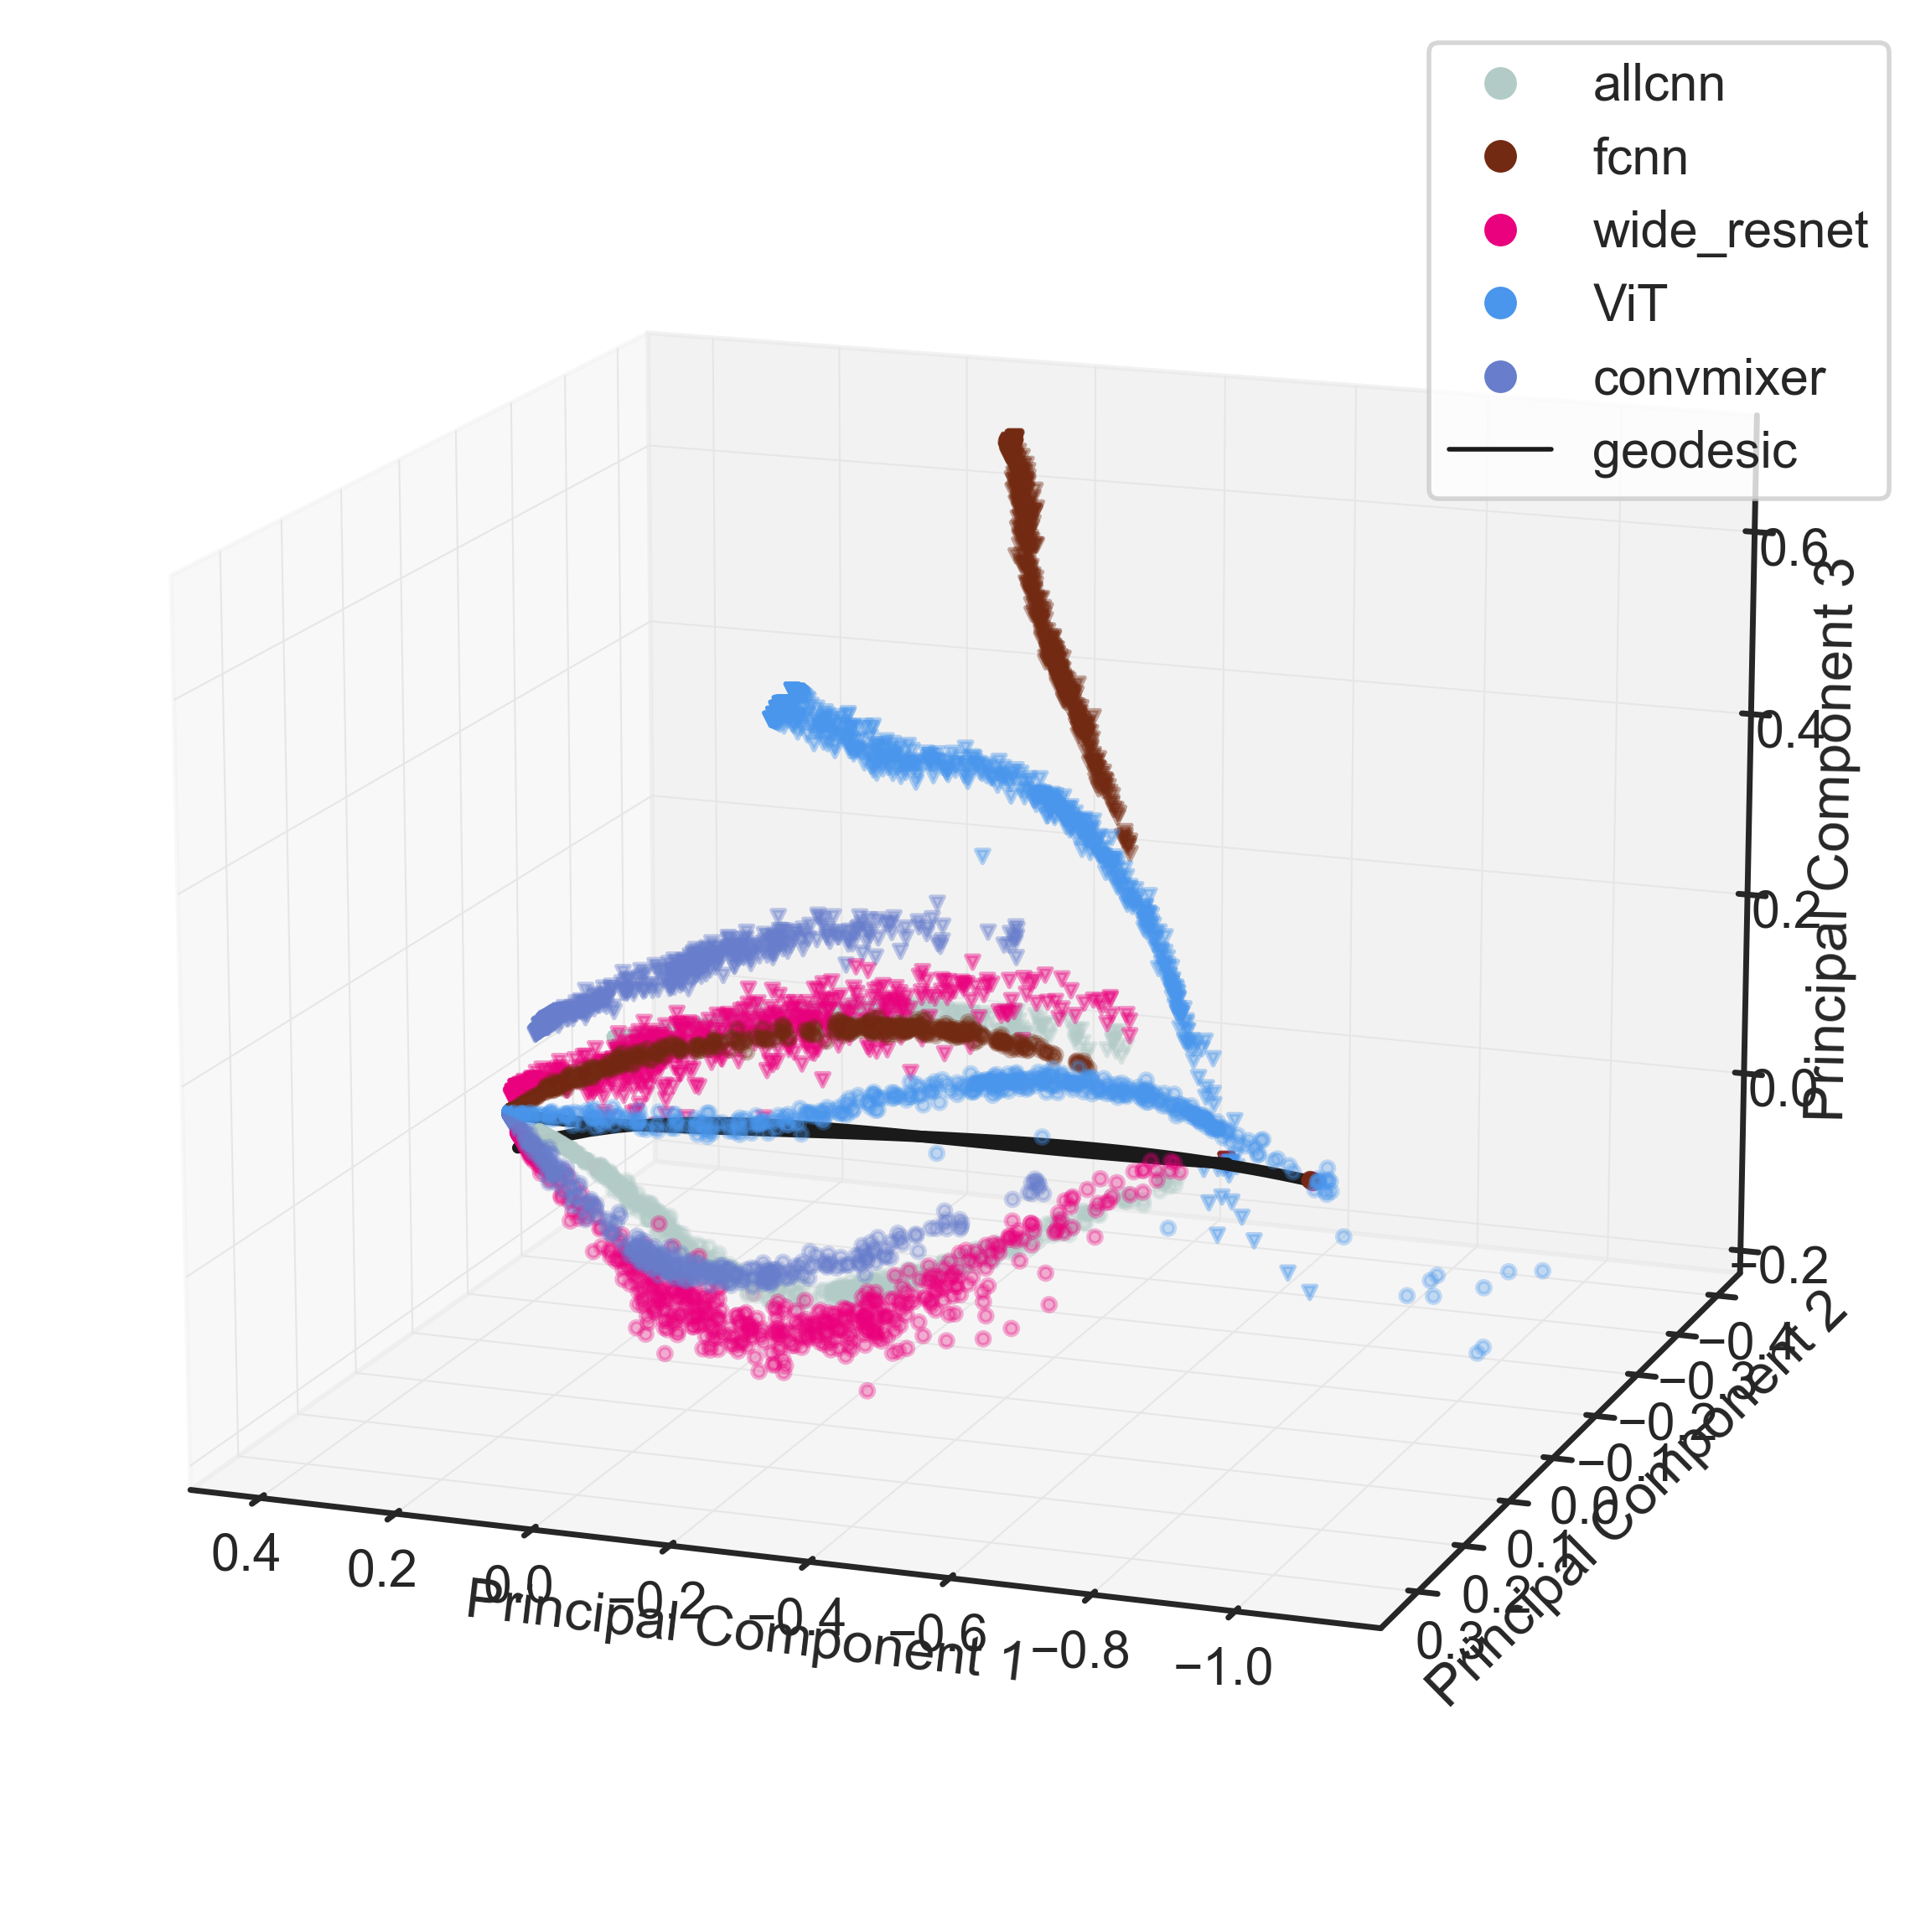

In [185]:
validation_2_training_ds  = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\valid2train_data.p','rb'))
xp_train = validation_2_training_ds['xp_train']
xp_valid_project = validation_2_training_ds['xp_valid_project']
m_color = validation_2_training_ds['m_color']

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp_valid_project[:-67,0], xp_valid_project[:-67,1],xp_valid_project[:-67,2], c= m_color,s=30,marker = 'v', alpha = 0.4)
ax.scatter(xp_train[:-67,0], xp_train[:-67,1],xp_train[:-67,2], c= m_color,s=30,alpha = 0.3)
ax.plot(xp_valid_project[-67:,0], xp_valid_project[-67:,1], xp_valid_project[-67:,2], linewidth = 5, c='k')
ax.plot(xp_train[-67:,0], xp_train[-67:,1],xp_train[-67:,2], linewidth = 5, c='k')

plt.legend(['allcnn','fcnn','wide_resnet','ViT','convmixer','geodesic'],fontsize=20,fancybox = True)

legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='allcnn',
                          markerfacecolor=m_c['allcnn'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='fcnn',
                          markerfacecolor=m_c['fcnn'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='wide_resnet',
                          markerfacecolor=m_c['wide_resnet'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='ViT',
                          markerfacecolor=m_c['ViT'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='convmixer',
                          markerfacecolor=m_c['convmixer'], markersize=15),
                   Line2D([0], [0], color='k', lw=2, label='geodesic')
                   ]

plt.legend(handles=legend_elements)
ax.view_init(15,110)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Subsampled Embedding Explained Pairwise Distance Plot

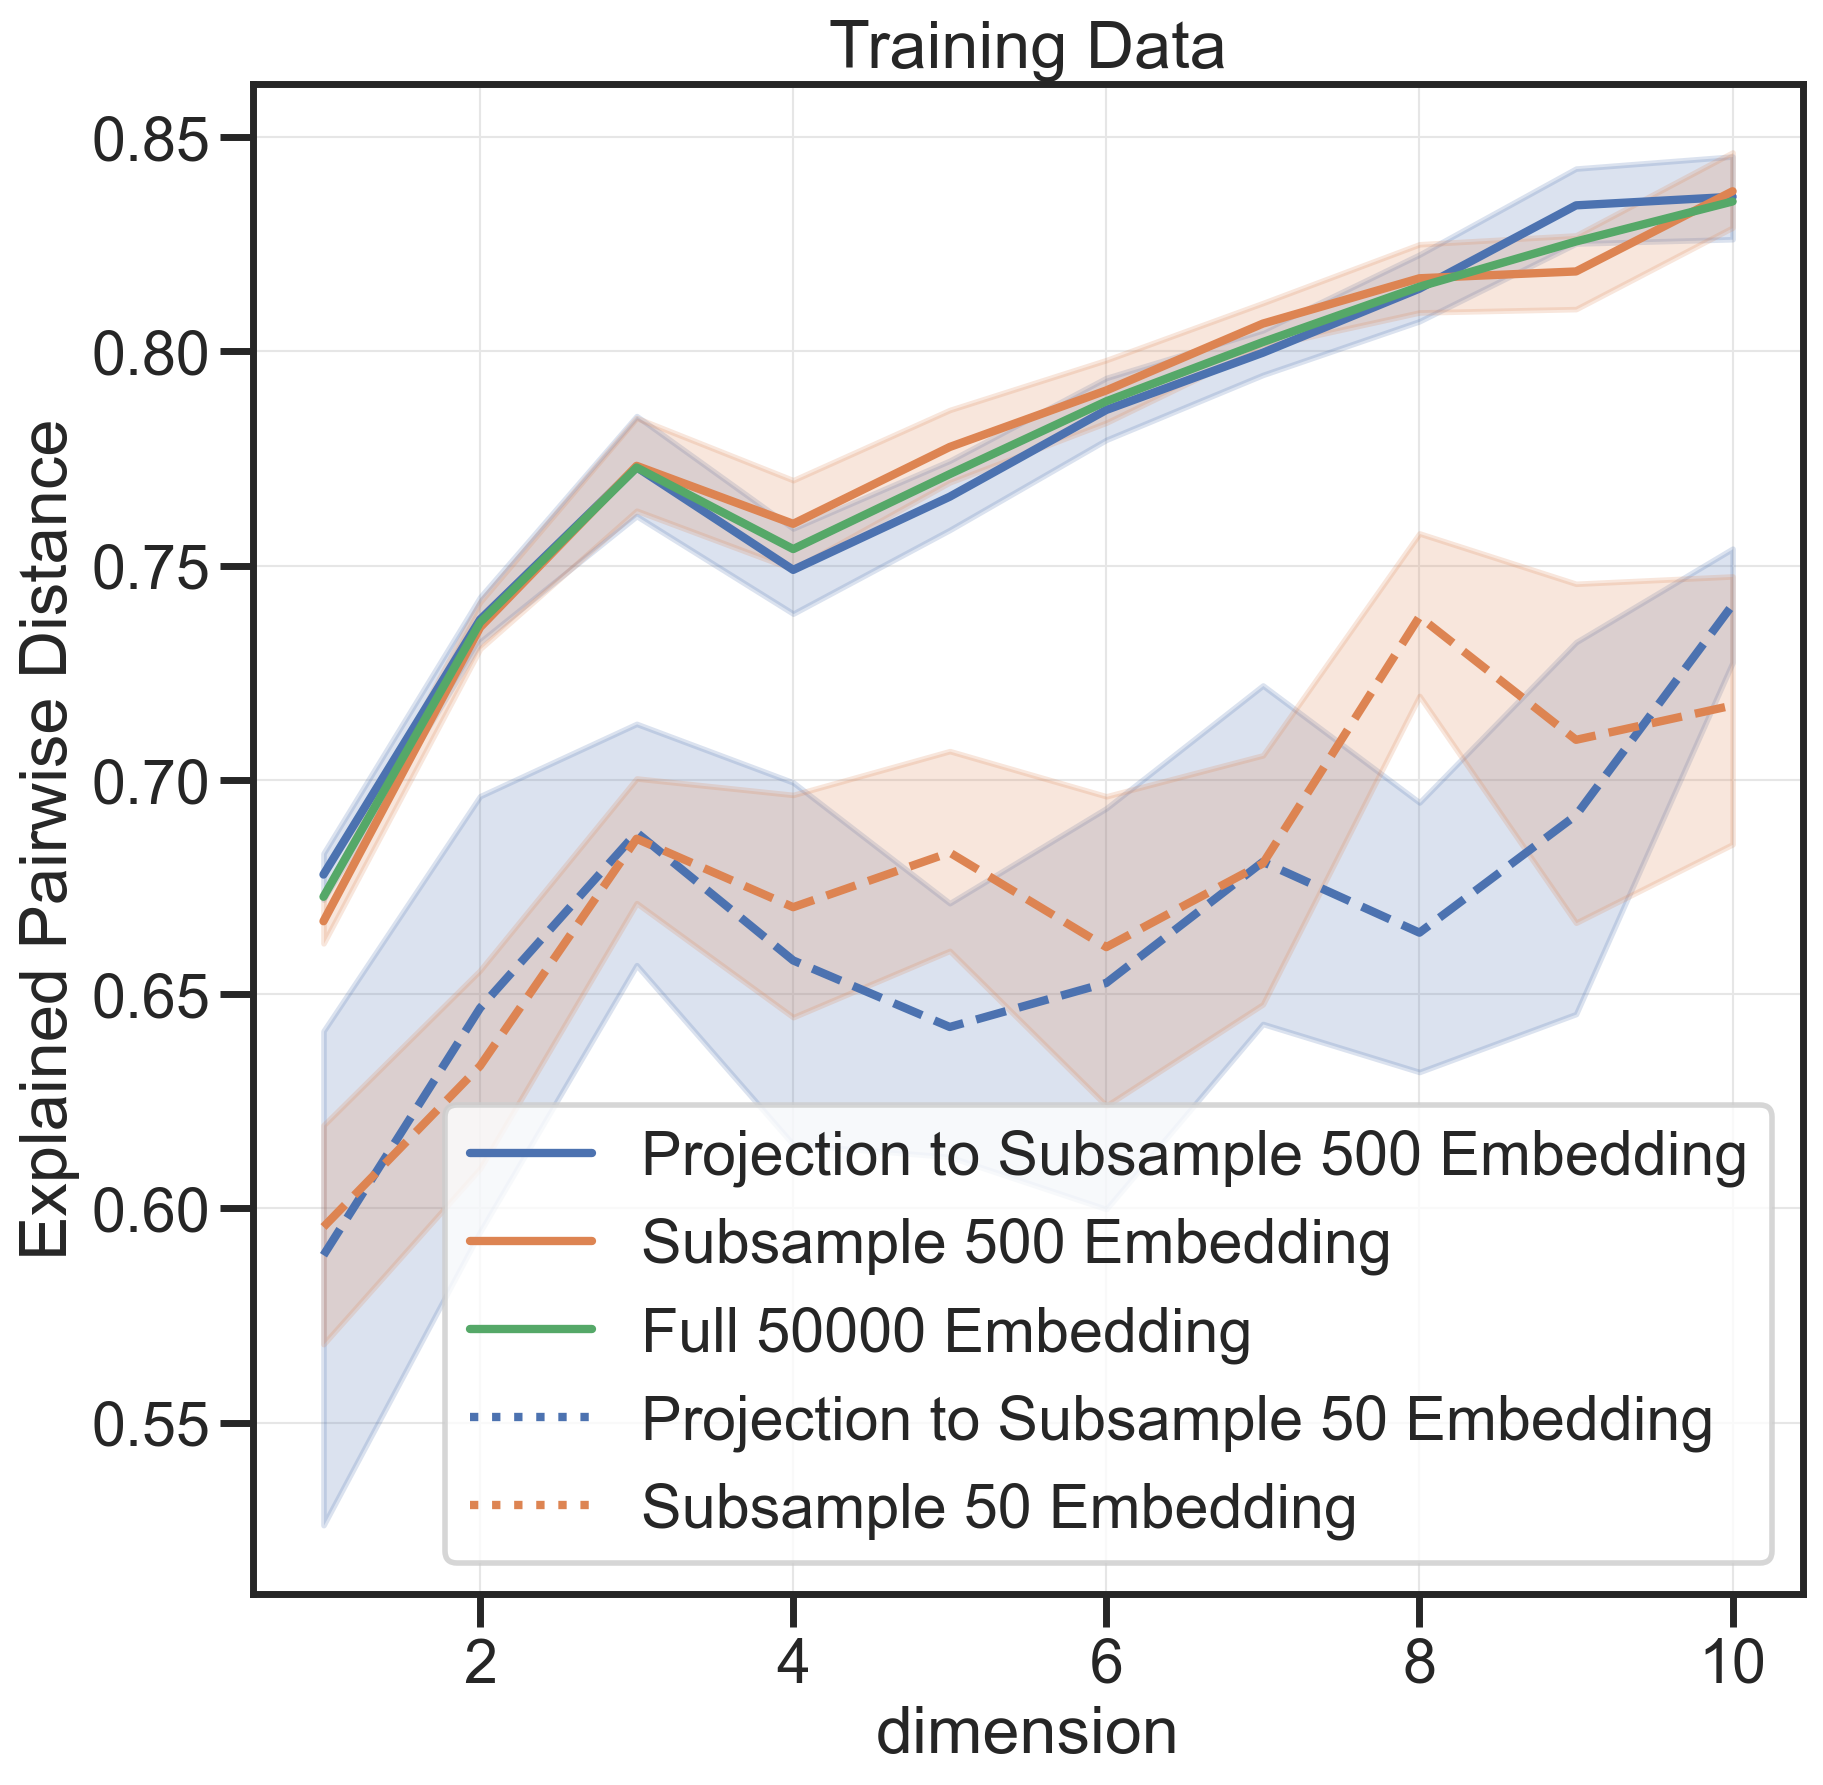

In [186]:
rel_error_all_= pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\train_subsample_err_all.p','rb'))

s=500
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 500 Embedding','Subsample 500 Embedding', 'Full 50000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 500 Embedding','Subsample 500 Embedding', 'Full 50000 Embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable',markers=True, dashes=False).set(title='Training Data')

s=5
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 50 Embedding','Subsample 50 Embedding', 'Full 50000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 50 Embedding','Subsample 50 Embedding'])

ax =sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable', linestyle='dashed')
ax.set_ylabel('Explained Pairwise Distance')
leg = ax.legend()
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle(":")
leg_lines[4].set_linestyle(":")

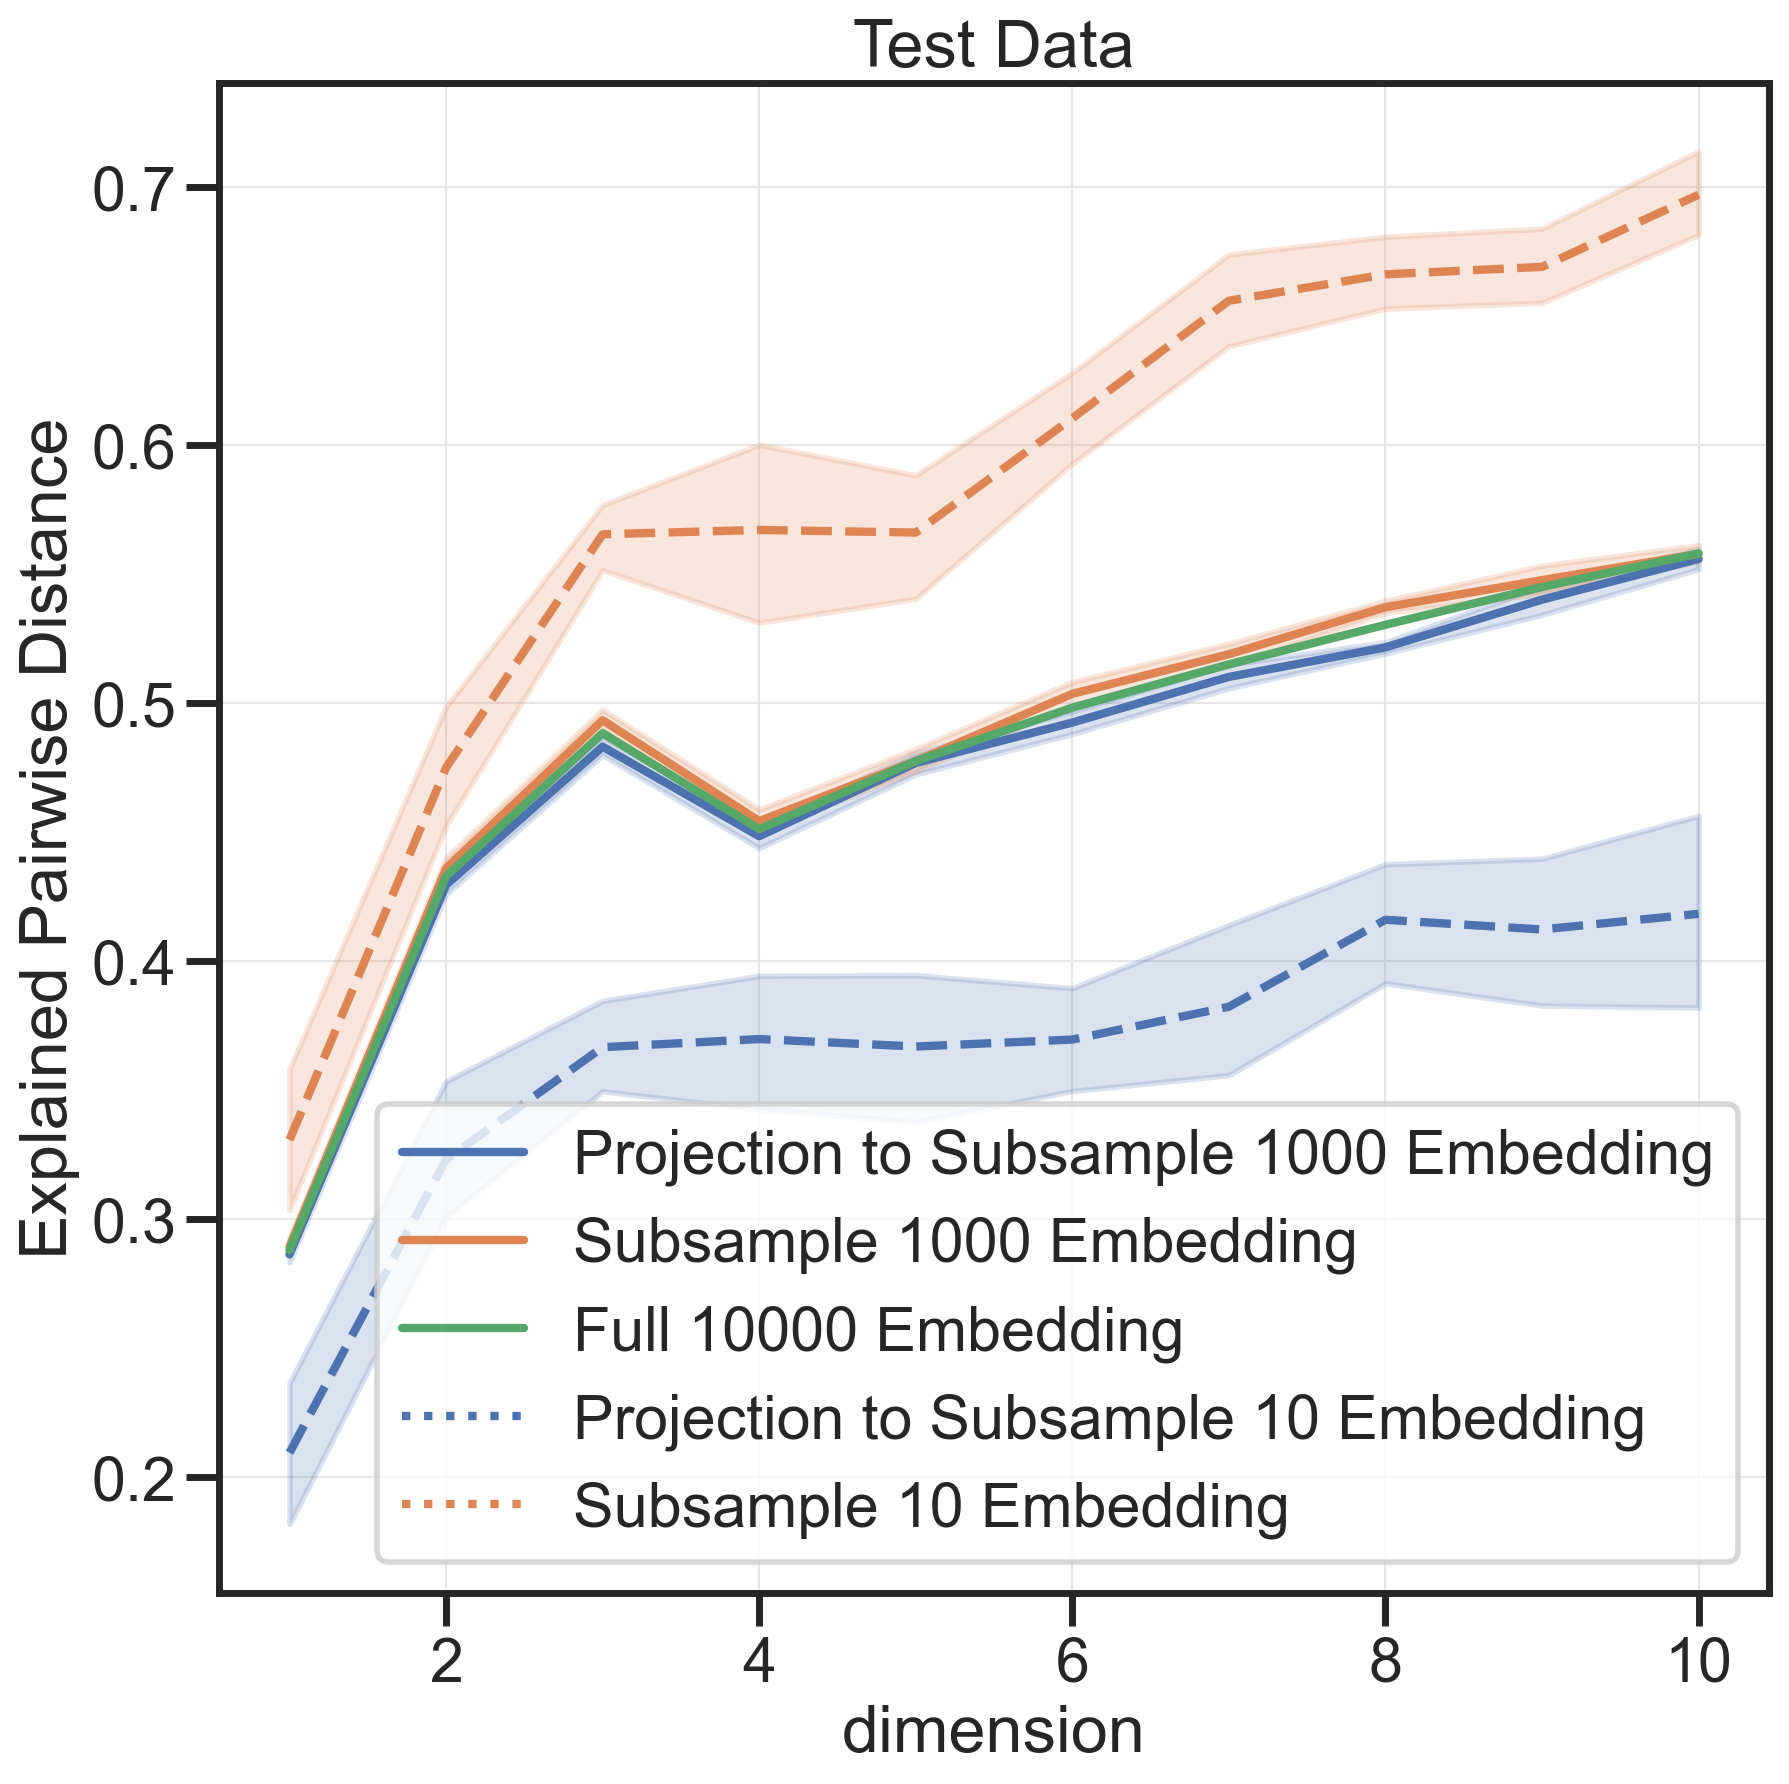

In [211]:
rel_error_all_test_ = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\test_subsample_err_all.p','rb'))

s=1000
tmp = rel_error_all_test_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 1000 Embedding','Subsample 1000 Embedding', 'Full 10000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 1000 Embedding','Subsample 1000 Embedding', 'Full 10000 Embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable',markers=True, dashes=False).set(title='Test Data')

s=10
tmp = rel_error_all_test_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 10 Embedding','Subsample 10 Embedding', 'Full 10000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 10 Embedding','Subsample 10 Embedding'])

ax =sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable', linestyle='dashed')
ax.set_ylabel('Explained Pairwise Distance')
leg = ax.legend()
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle(":")
leg_lines[4].set_linestyle(":")

# isKL plot

In [195]:
iskl_plot_ds = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\iskl_ds.p','rb'))


In [196]:
xp_skl= iskl_plot_ds['xp'] 

e_skl = iskl_plot_ds['e'] 

geo_traj = iskl_plot_ds['truth_traj']


In [213]:
np.sign(e_skl[:3])

array([ 1., -1.,  1.])

Text(0.5, 0, 'Principal Component 3')

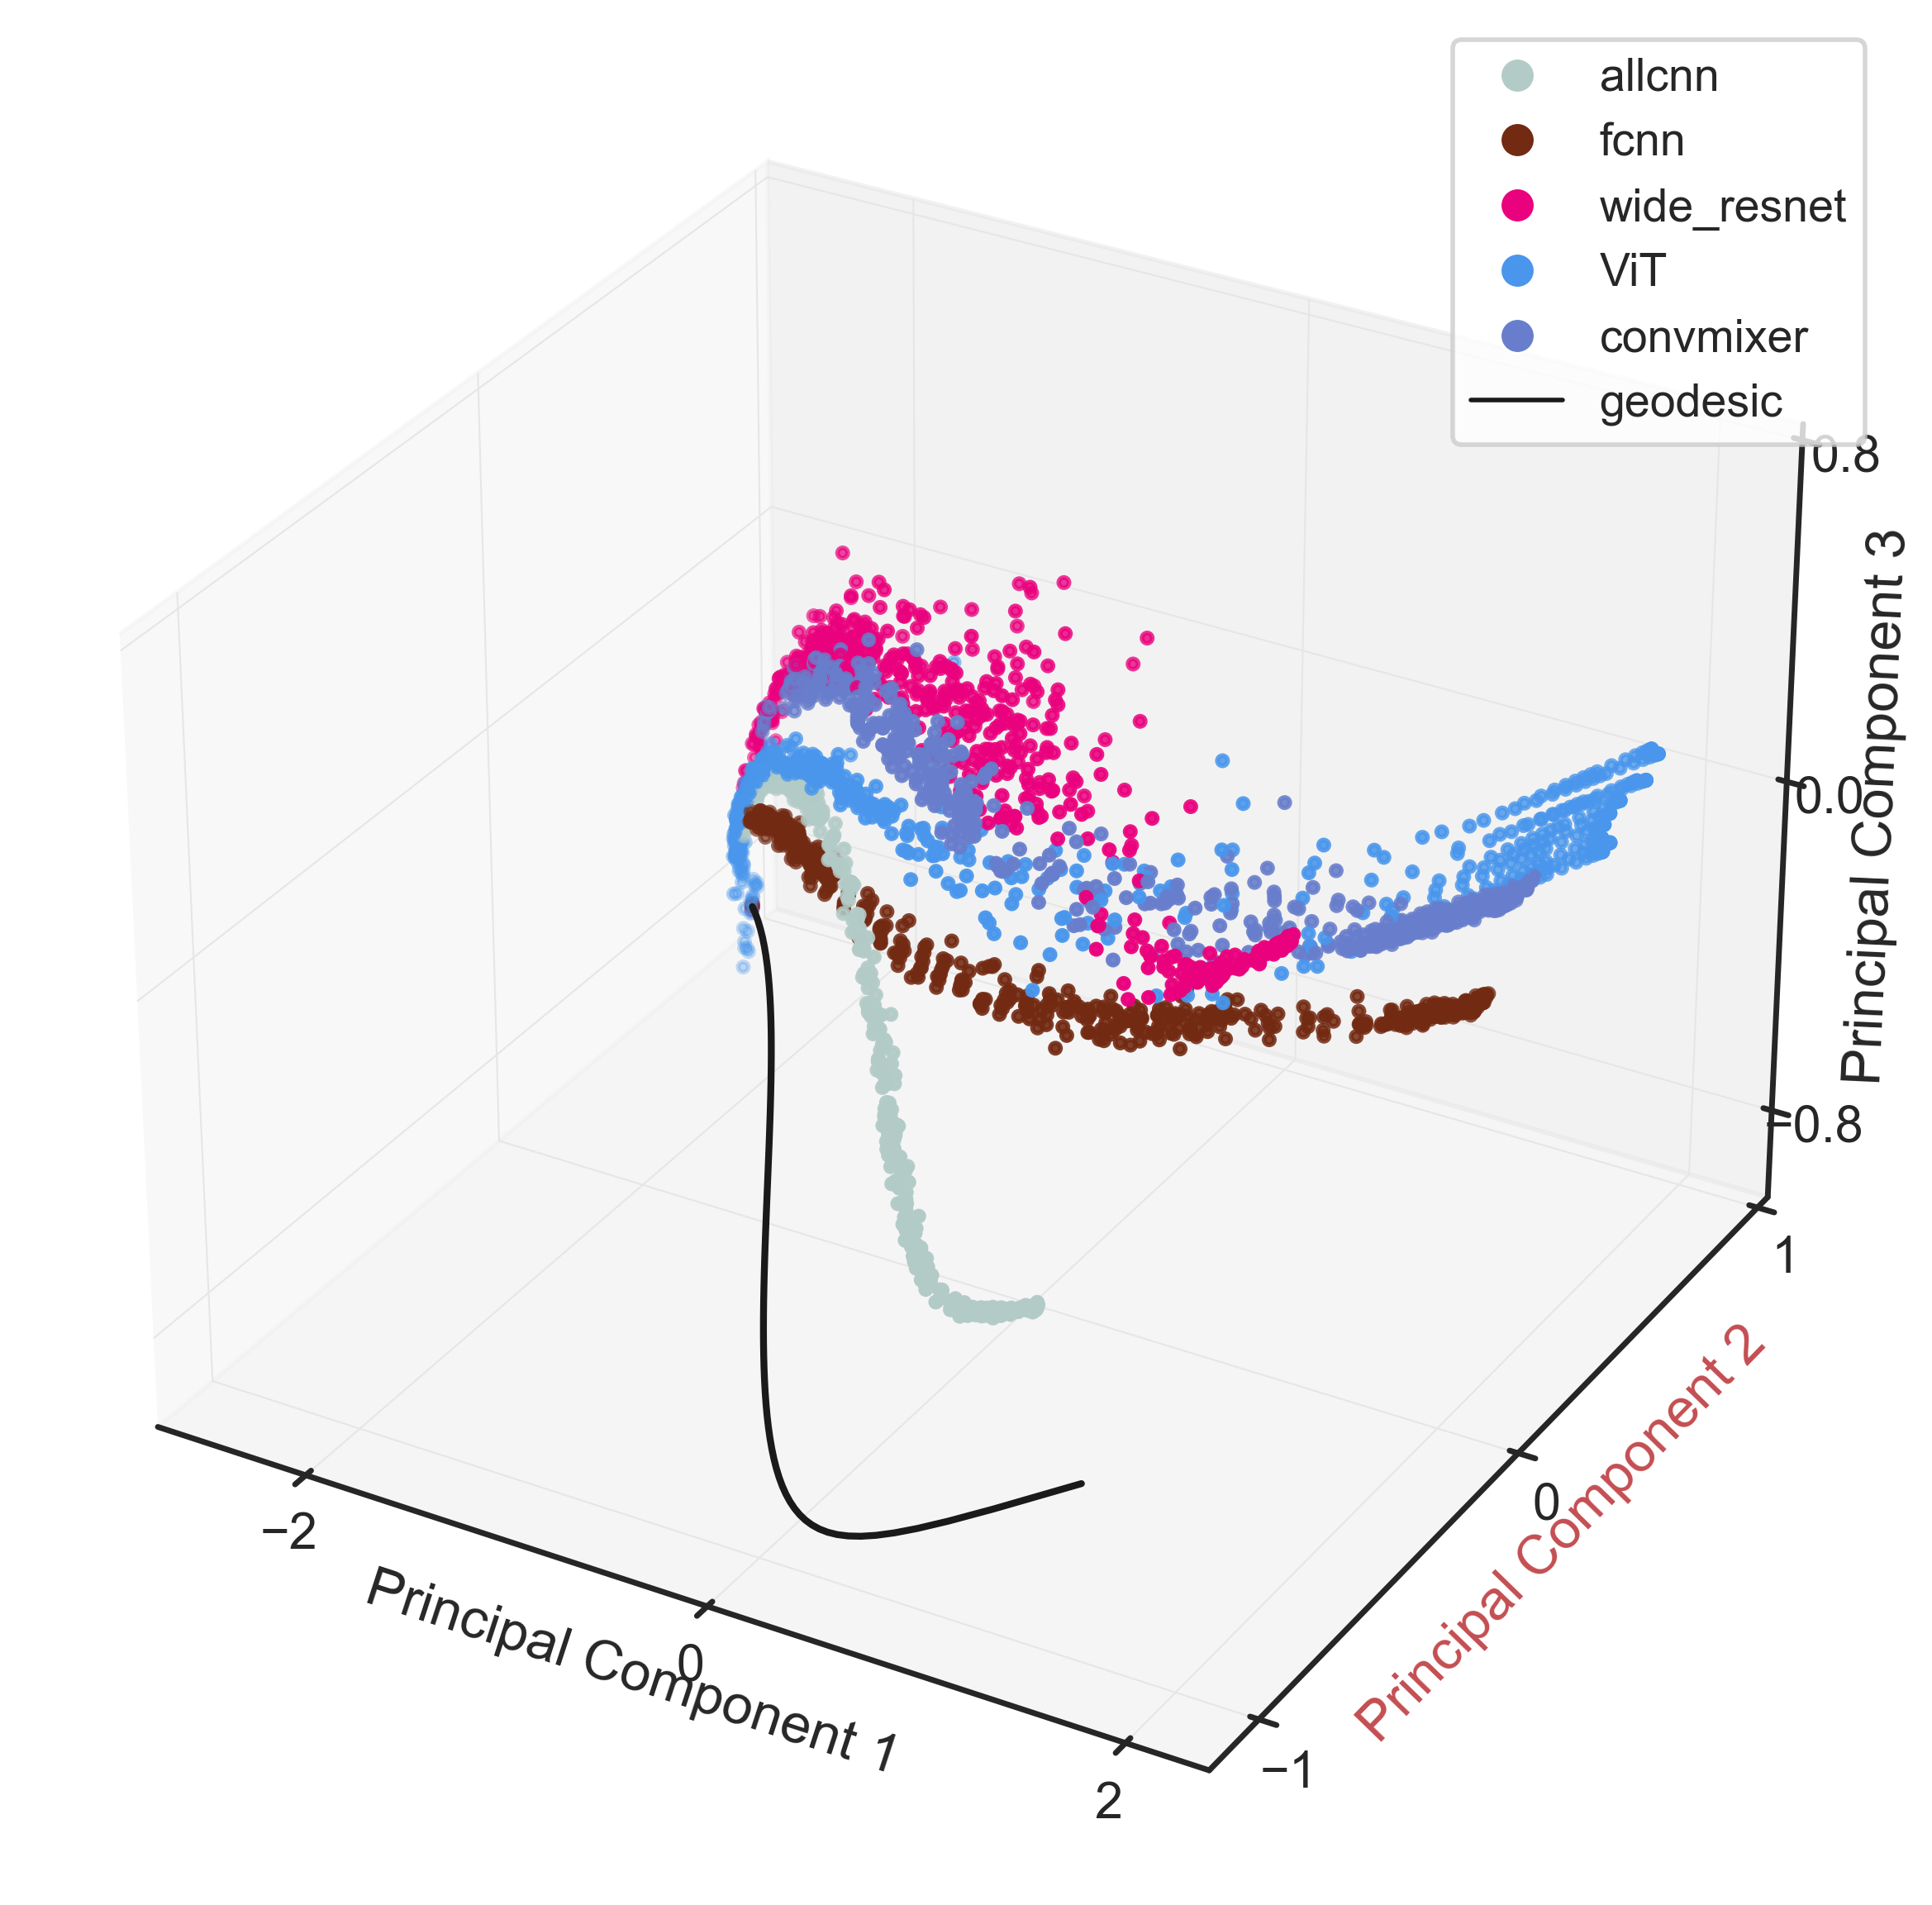

In [220]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp_skl[:,0],xp_skl[:,1],xp_skl[:,2],  c=m_color )
ax.plot(geo_traj [:,0],geo_traj [:,1],geo_traj [:,2],'k')
ax.legend(['allcnn','fcnn','wide_resnet','ViT','convmixer','geodesic'],fontsize=20,fancybox = True)

legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='allcnn',
                          markerfacecolor=m_c['allcnn'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='fcnn',
                          markerfacecolor=m_c['fcnn'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='wide_resnet',
                          markerfacecolor=m_c['wide_resnet'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='ViT',
                          markerfacecolor=m_c['ViT'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='convmixer',
                          markerfacecolor=m_c['convmixer'], markersize=15),
                   Line2D([0], [0], color='k', lw=2, label='geodesic')
                   ]

ax.legend(handles=legend_elements, fontsize = 20)
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-0.8, 0, 0.8])


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2',color='r')
ax.set_zlabel('Principal Component 3')

In [16]:
from matplotlib.lines import Line2D
import mpl_toolkits.mplot3d as a3
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.linalg as sp
import math
import os
import glob 
import torch as th
from random import choices
import tqdm
import pickle
# save path 
save_path = path_
num_chkpoints = 2043

t_jialin = np.array([    0,     1,    63,   125,   187,   249,   251,   313,   375,
      437,   499,   501,   563,   625,   687,   749,   751,   813,
      875,   937,   999,  1001,  1063,  1125,  1187,  1249,  1500,
     1750,  2000,  2250,  2500,  2750,  3000,  3250,  3500,  3750,
     4000,  4250,  4500,  4750,  5000,  5250,  5500,  5750,  6000,
     6250,  6500,  7250,  8250,  9250, 10250, 11250, 12250, 13250,
    14250, 15250, 16250, 19000, 22750, 26500, 30250, 34000, 37750,
    41500, 45250, 49000, 50000])
t_save = set(list(np.arange(1000))+list(t_jialin) + list(np.arange(15000,35000,20)))
t_save = list(t_save)
t_save.sort()
 
jialin_ind = [np.where(t_save==k)[0][0] for k in t_jialin]

m_color = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\m_color.pkl',"rb"))
m_c  = {'allcnn': np.array([0.70285846, 0.79622919, 0.7814517 ]),
 'fcnn': np.array([0.45234079, 0.16555418, 0.071493  ]),
 'wide_resnet': np.array([0.91763101, 0.00539246, 0.49168774]),
 'ViT': np.array([0.2873541 , 0.58912797, 0.9247179 ]),
 'convmixer': np.array([0.40839386, 0.49308246, 0.80048501])}

In [4]:

def embed_lazy(dp,dist_list,embed_dimension=3):
    # given dist_list and dp = distances between p to p_list from which dist_list was composed find embedding in dist_list
    length=np.shape(dist_list)[1]
    P=np.eye(length)-np.ones((length,length))/length
    e_values, e_vectors= np.linalg.eig(-.5*np.matmul(np.matmul(P,dist_list),P))
    e_values = e_values[:embed_dimension]
    e_vectors = e_vectors[:,:embed_dimension]
    sqrtsigma = np.sqrt(np.abs(e_values))
    project_vectors = np.matmul(e_vectors,np.diag(1/sqrtsigma))
    d_mean=np.mean(dist_list,1)
    d_mean_mean=np.mean(dist_list)
    dp_mean = -.5*(np.matmul(dp,P)-d_mean+d_mean_mean)        
    return np.matmul(dp_mean,project_vectors)

In [20]:


def dinpca(x1, x2=None, sign=1, dev='cuda', sqrt=False):
    # x1, x2  shape (nmodels, ncoords)
    # sign (ncoords, ), sign of each coordinate
    x1, sign = x1.to(dev), sign.to(dev)
    if x2 is None:
        B = x1 @ th.diag(sign) @ x1.T
        d = th.diag(B).repeat(len(x1), 1) + th.diag(B).repeat(len(x1), 1).T - 2*B
    else:
        x2 = x2.to(dev)
        d = (((x1[None, ...] - x2[:, None, ...])**2) * sign.reshape(1, 1, -1)).sum(-1)
    if sqrt:
        return th.sqrt(th.maximum(d, th.zeros_like(d)))
    return d

def dbhat(x1, x2, reduction='mean', dev='cuda', debug=False, chunks=1000):
    "from jialin's repo"
    # x1, x2 shape (num_points, num_samples, num_classes)
    np1, ns, _ = x1.size()
    np2, ns, _ = x2.size()
   
    x1, x2 = x1.transpose(0, 1), x2.transpose(0, 1)
    w = np.zeros([np1, np2])

    chunks = chunks or 1;
    for aa in (th.chunk(th.arange(ns), chunks)):
        xx1 = x1[aa, :].to(dev)
        xx2 = x2[aa, :].to(dev)
        aa = th.sqrt(aa)
        w_ = -th.log(th.bmm(th.sqrt(xx1), th.sqrt(xx2).transpose(1, 2)))
        w_[w_ > 1e12] = 100
        w_[w_ < 0] = 0
        w += w_.sum(0).cpu().numpy()
    if reduction == 'mean':
        return w / ns
    else:
        return w

def projection(Dbhatt):
    """
    From jialin's proj function
    """
    ne = 3
    n = Dbhatt.shape[0]
    l = np.eye(Dbhatt.shape[0]) - 1.0/Dbhatt.shape[0]
    w = -l @ Dbhatt @ l / 2

    e1, v1 = sp.eigh(w, driver='evx', check_finite=False,
                     subset_by_index=[n-(ne+1), n-1])
    e2, v2 = sp.eigh(w , driver='evx', check_finite=False,
                     subset_by_index=[0, (ne+1)])
    e = np.concatenate((e1, e2))
    v = np.concatenate((v1, v2), axis=1)

    ii = np.argsort(np.abs(e))[::-1]
    e, v = e[ii], v[:, ii]
    xp = v*np.sqrt(np.abs(e))
    
    return xp, e, v

def new_points_in_embedding(new_points, p_list, dist_mat, eig_values, eig_vecs, distance = dbhat, embed_dimension =3):
    """
    From Itay's function 
    
    - slight modification for efficiency 
    
    """
    # using jialin's dbhatt/ diskl function 
    dp=distance(th.Tensor(new_points),th.Tensor(p_list),chunks= 20000)   
        
    d_mean=np.mean(dist_mat,0)
    d_mean_mean=np.mean(d_mean)
    dp_mean=dp-np.mean(dp)-d_mean+d_mean_mean
    dp_mean=-.5*dp_mean
    sqrtsigma=np.sqrt(np.abs(eig_values))
    
    return ((1/sqrtsigma)*np.matmul(dp_mean,eig_vecs))

# Training Set Distance Matrix

In [38]:
#extract data from sgd dataset
p_listt = th.zeros((3350,50000,10))
for i in range(len(sgd_dataset)):
    p_listt[i,:,:] = th.exp(th.Tensor(sgd_dataset['yh'][i]))
# create geodesic 
truth_label= pickle.load(open(os.path.join(r'C:\Users\Itay\Documents\ipcaLocal\Centroid Figures for Jialin Paper','truth_label.p'), 'rb')) 
y = np.zeros((50000, 10))
y[np.arange(50000), truth_label] = 1
ig2truth = th.Tensor(np.array([linear_interp_ignorance_to_truth(lambd_,truth_=y) for lambd_ in np.linspace(0,.99,67,endpoint=True)])  )


D_bhatt  = dbhat(th.concat((p_list,th.Tensor(ig2truth)),axis=0),th.concat((p_list,th.Tensor(ig2truth)),axis=0),chunks=10000)
xp_train, e_train, v_train = projection(Dbhatt)
pickle.dump(D_bhatt,open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\d_bhatt_train.p','wb'))


In [6]:
Dbhatt = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\d_bhatt_train.p','rb'))


In [9]:
xp_train, e_train, v_train = projection(Dbhatt)


# Test Set Distance Matrix


In [40]:

# extract data from sgd dataset
p_list = th.zeros((3350,10000,10))
for i in range(len(sgd_dataset)):
    p_list[i,:,:] = th.exp(th.Tensor(sgd_dataset['yvh'][i]))
# create geodesic 
truth_label= pickle.load(open(os.path.join(r'C:\Users\Itay\Documents\ipcaLocal\Centroid Figures for Jialin Paper','truth_validation.p'), 'rb')) 
y = np.zeros((10000, 10))
y[np.arange(10000), truth_label] = 1
ig2truth_test = th.Tensor(np.array([linear_interp_ignorance_to_truth(lambd_,truth_=y) for lambd_ in np.linspace(0,.99,67,endpoint=True)])  )

Dbhatt_test = dbhat(th.concat((p_list,th.Tensor(ig2truth_test)),axis=0),th.concat((p_list,th.Tensor(ig2truth_test)),axis=0),chunks=10000)
xp_test, e_test, v_test = projection(Dbhatt_test)
pickle.dump(Dbhatt_test,open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\d_bhatt_test.p','wb'))


100%|██████████████████████████████████████████████████████████████████████████████████| 67/67 [30:12<00:00, 27.06s/it]


In [7]:
Dbhatt_test = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\d_bhatt_test.p','rb'))

In [10]:
xp_test, e_test, v_test = projection(Dbhatt_test)


# Embed Test set to Training Set Embedding 


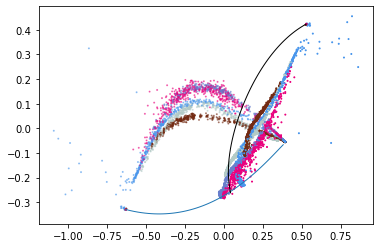

In [11]:

xp_ = embed_lazy(Dbhatt_test,Dbhatt,embed_dimension=200)
plt.scatter(xp_train[:-67,0], xp_train[:-67,1], c= m_color,s=1,alpha=0.5)
plt.plot(xp_train[-67:,0], xp_train[-67:,1], linewidth = 1)
plt.scatter(xp_[:-67,0], xp_[:-67,1], c= m_color,s=1)
plt.plot(xp_[-67:,0], xp_[-67:,1], linewidth = 1, c='k')


# Rotate test geodesic so that it alligns with train geodesic


In [12]:

def centroid(points):
    return np.mean(points, axis=0)
def kabsch(P, Q, allow_reflection=True):
    # Translate both sets to their centroids
    P_centroid = centroid(P)
    Q_centroid = centroid(Q)
    P_centered = P - P_centroid
    Q_centered = Q - Q_centroid

    # Compute the covariance matrix
    C = np.dot(np.transpose(P_centered), Q_centered)

    # Compute the optimal rotation matrix using singular value decomposition
    V, S, Wt = np.linalg.svd(C)

    # Check if there is a reflection
    d = (np.linalg.det(V) * np.linalg.det(Wt)) < 0.0

    if allow_reflection:
        if d:
            S[-1] = -S[-1]
            V[:, -1] = -V[:, -1]
    else:
        if d:
            Wt[-1, :] = -Wt[-1, :]

    # Create the rotation matrix
    R = np.dot(V, Wt)

    return R, P_centroid, Q_centroid

def apply_transform(P, R, P_centroid, Q_centroid):
    return np.dot(P - P_centroid, R) + Q_centroid

Text(0.5, 0, 'Principal Component 3')

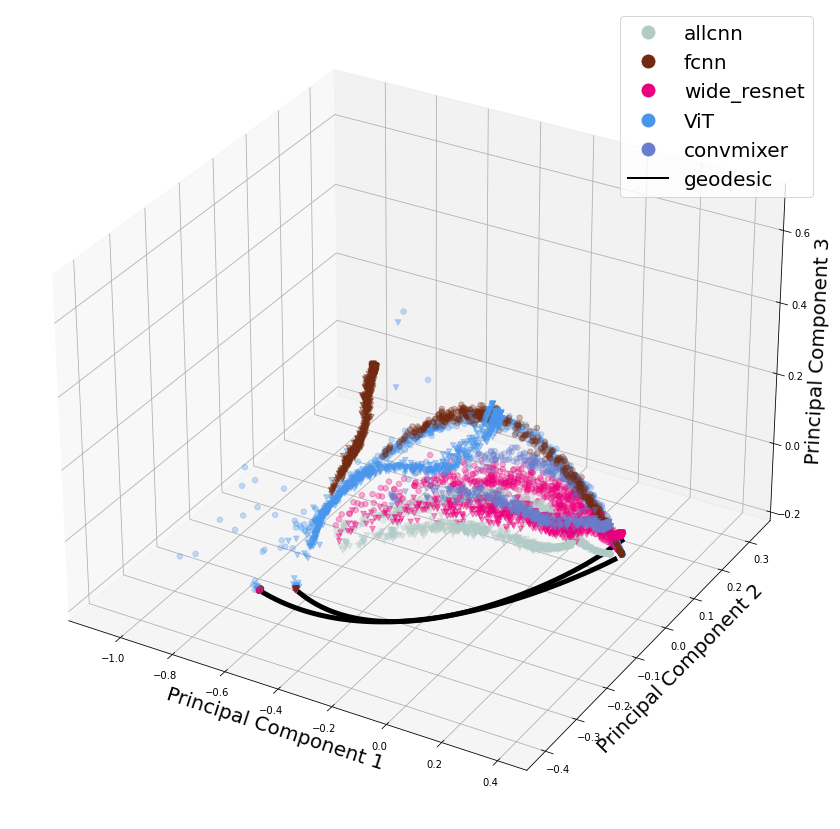

In [19]:

n= 3
R, P_centroid, Q_centroid = kabsch(xp_[-67:,:n], xp_train[-67:,:n])
P_transformed = apply_transform(xp_[:,:n], R, P_centroid, Q_centroid)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P_transformed[:-67,0], P_transformed[:-67,1],P_transformed[:-67,2], c= m_color,s=30,marker = 'v', alpha = 0.4)
ax.scatter(xp_train[:-67,0], xp_train[:-67,1],xp_train[:-67,2], c= m_color,s=30,alpha = 0.3)
ax.plot(P_transformed[-67:,0], P_transformed[-67:,1], P_transformed[-67:,2], linewidth = 5, c='k')
ax.plot(xp_train[-67:,0], xp_train[-67:,1],xp_train[-67:,2], linewidth = 5, c='k')

plt.legend(['allcnn','fcnn','wide_resnet','ViT','convmixer','geodesic'],fontsize=20,fancybox = True)

legend_elements = [
                   Line2D([0], [0], marker='o', color='w', label='allcnn',
                          markerfacecolor=m_c['allcnn'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='fcnn',
                          markerfacecolor=m_c['fcnn'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='wide_resnet',
                          markerfacecolor=m_c['wide_resnet'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='ViT',
                          markerfacecolor=m_c['ViT'], markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='convmixer',
                          markerfacecolor=m_c['convmixer'], markersize=15),
                   Line2D([0], [0], color='k', lw=2, label='geodesic')
                   ]

plt.legend(handles=legend_elements, fontsize = 20)
#ax.view_init(15,110)

ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_zlabel('Principal Component 3', fontsize = 20)


# Data for plotting

In [181]:
validation_2_training_ds ={}
validation_2_training_ds['xp_train']=xp_train
validation_2_training_ds['xp_valid_project']=P_transformed
validation_2_training_ds['m_color']=m_color

pickle.dump(validation_2_training_ds ,open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\valid2train_data.p','wb'))

# Subsampled Space Embedding  - Training Data

In [ ]:

rel_error_all_ = {}
ne = 10
repeat = 10;

for s in [5,50,500,5000]:
    rel_error = np.zeros((4,100))
        
    for r in range(repeat):
        rel_error[0,10*r:10*(r+1)]= np.arange(1,11)
        
        for i in range(1,ne+1):
            rand_ind = np.random.permutation(50000)[:s]
            dbhatt_subsample = dbhat(p_all[:,rand_ind,:],p_all[:,rand_ind,:],chunks=2000)
            
            xp_project_to_sub = embed_lazy(dbhatt_full,dbhatt_subsample,embed_dimension=20 )
            xp_tmp, e_tmp, _ = projection( dbhatt_subsample)
            
            dd = dinpca(th.tensor(xp_project_to_sub[:, :i]), sign=th.tensor(np.sign(e_tmp[:i])).double()).cpu().numpy()
            ddrtrue = dinpca(th.tensor(xp_tmp[:, :i]), sign=th.tensor(np.sign(e_tmp[:i])).double()).cpu().numpy()
            dd_ori = dinpca(th.tensor(xp_train[:, :i]), sign=th.tensor(np.sign(e_train[:i])).double()).cpu().numpy()
            
            rel_error[1:,r*10+i]=(((np.abs(dd - dbhatt_full)).sum() / dbhatt_full.sum(), 
                              (np.abs(ddrtrue - dbhatt_full)).sum() / dbhatt_full.sum(),
                              (np.abs(dd_ori - dbhatt_full)).sum() / dbhatt_full.sum()))
    rel_error_all_[s] = rel_error

pickle.dump(rel_error_all_,open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\train_subsample_err_all.p','wb'))


In [64]:
rel_error_all_= pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\train_subsample_err_all.p','rb'))


In [141]:
rel_error_all_ = {}
for s in [5,50,500,5000]:
    tpm = np.zeros((4,100))
    for t in range(10):
        tpm[0,10*t:10*(t+1)] = np.arange(1,11)
        tpm[1,10*t:10*(t+1)] = 1-rel_error_all[s][t,0,:]
        tpm[2,10*t:10*(t+1)] = 1-rel_error_all[s][t,1,:]
        tpm[3,10*t:10*(t+1)] = 1-rel_error_all[s][t,2,:]
        
    rel_error_all_[s] = tpm

[Text(0.5, 1.0, 'Subsampled 5 Images')]

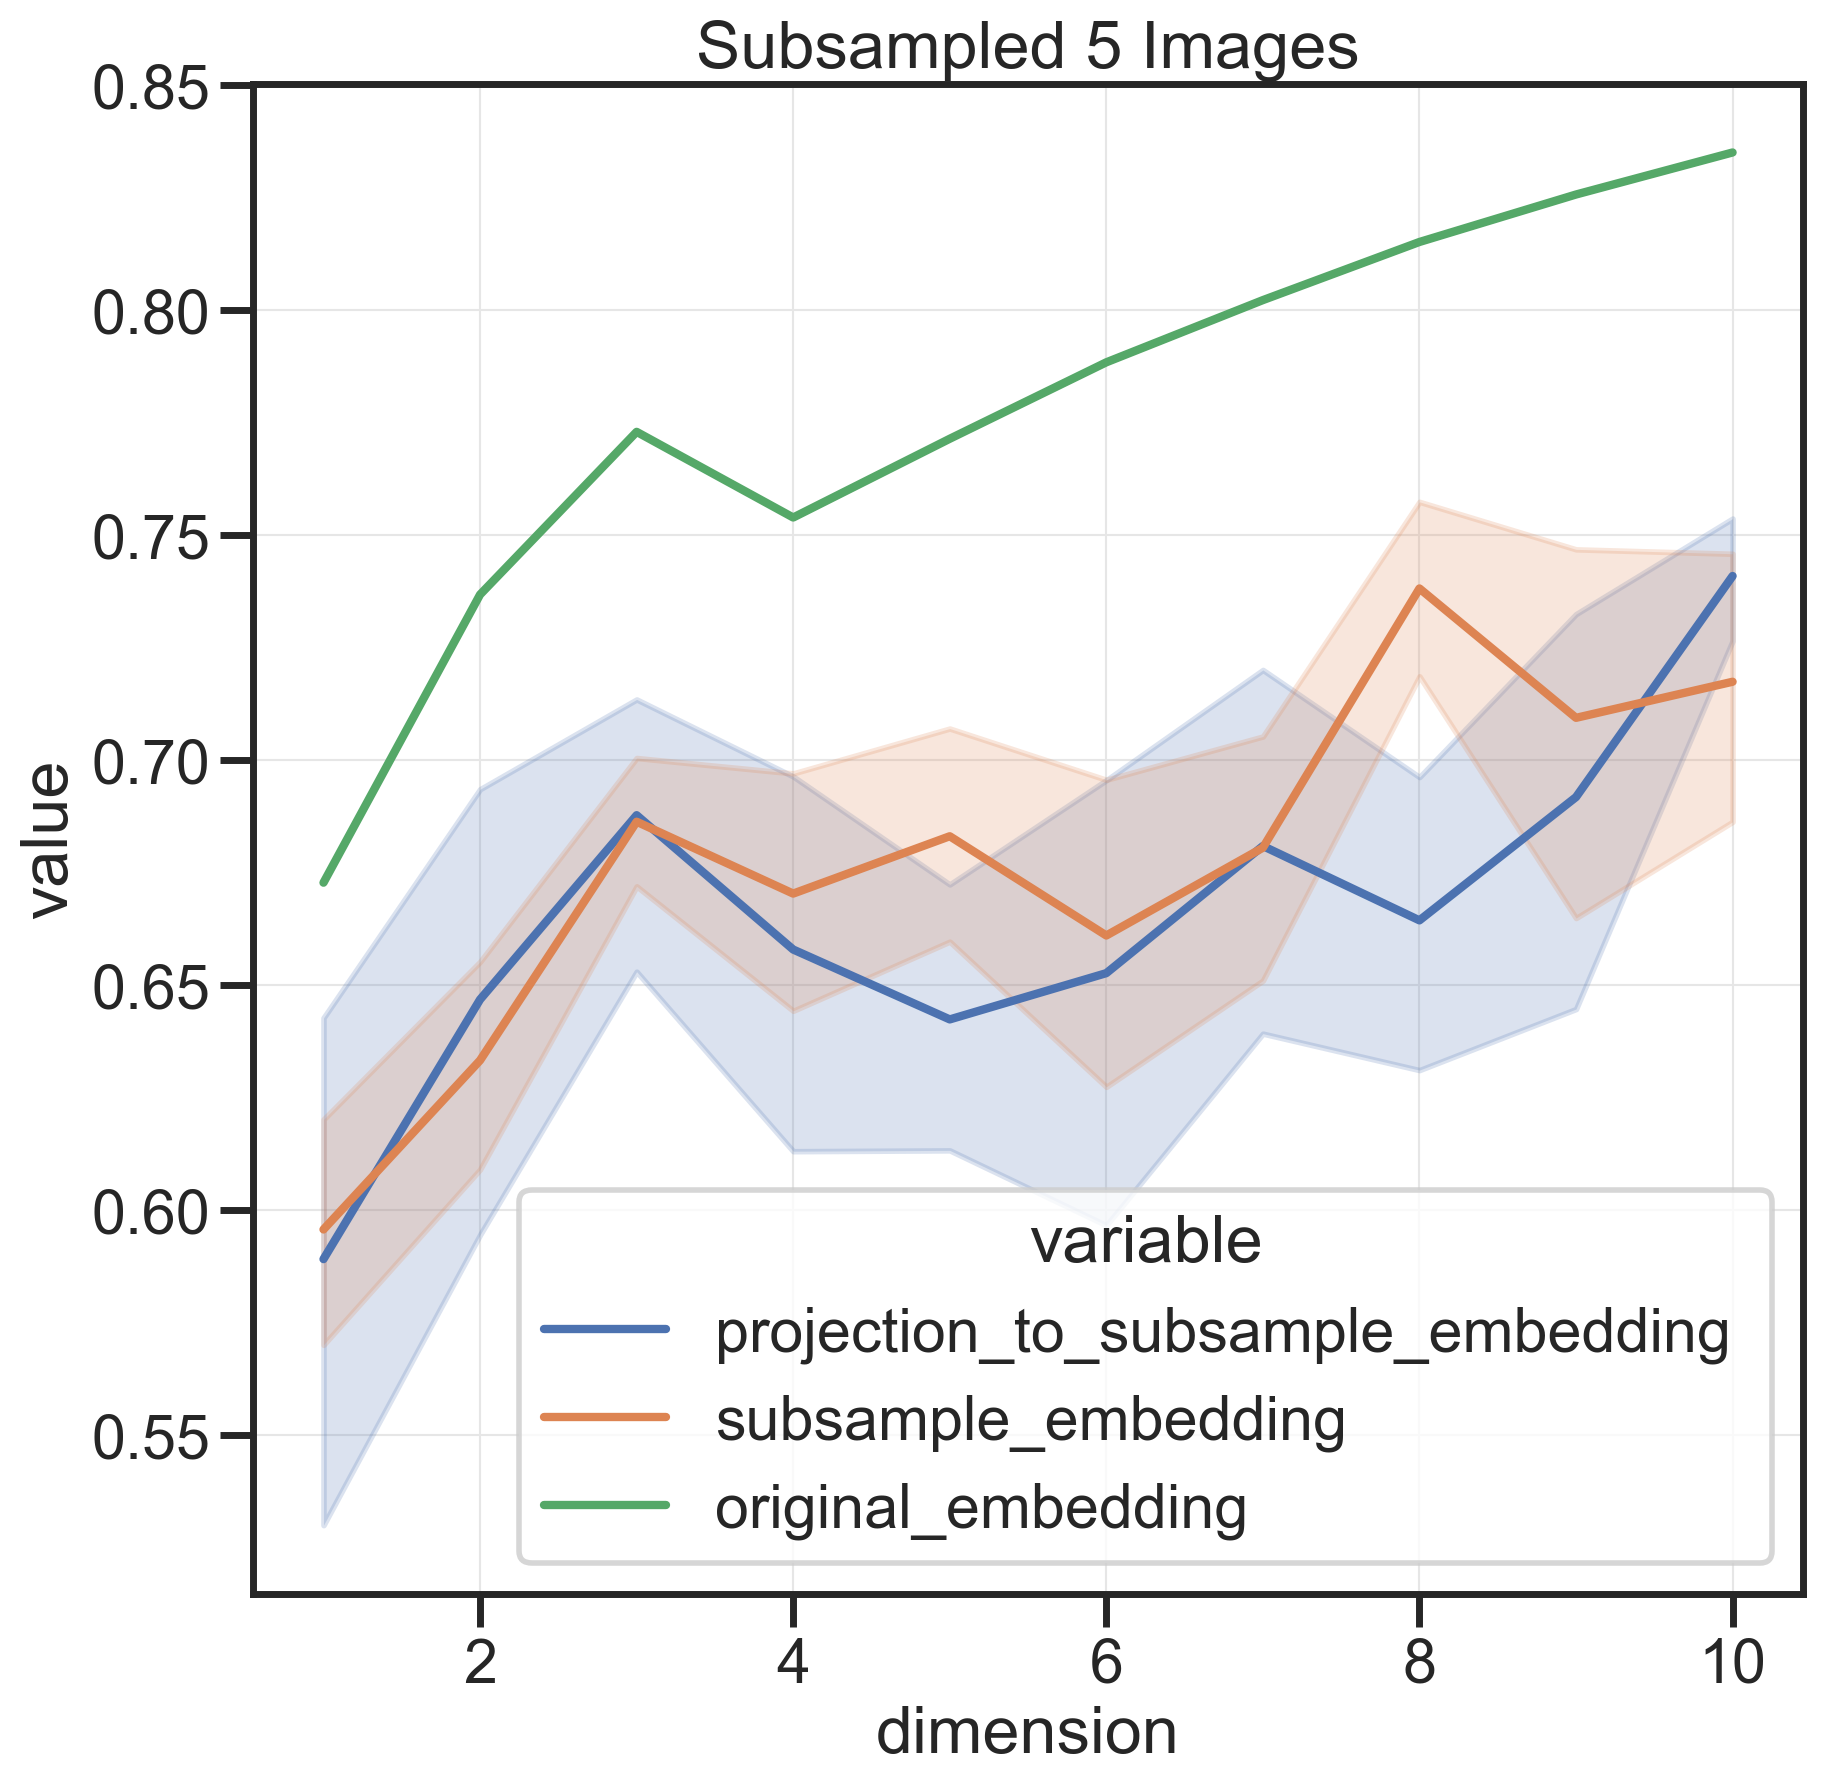

In [142]:
rel_error_all_= pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\train_subsample_err_all.p','rb'))

s=5
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable').set(title='Subsampled '+str(s)+' Images')



[Text(0.5, 1.0, 'Subsampled 50 Images')]

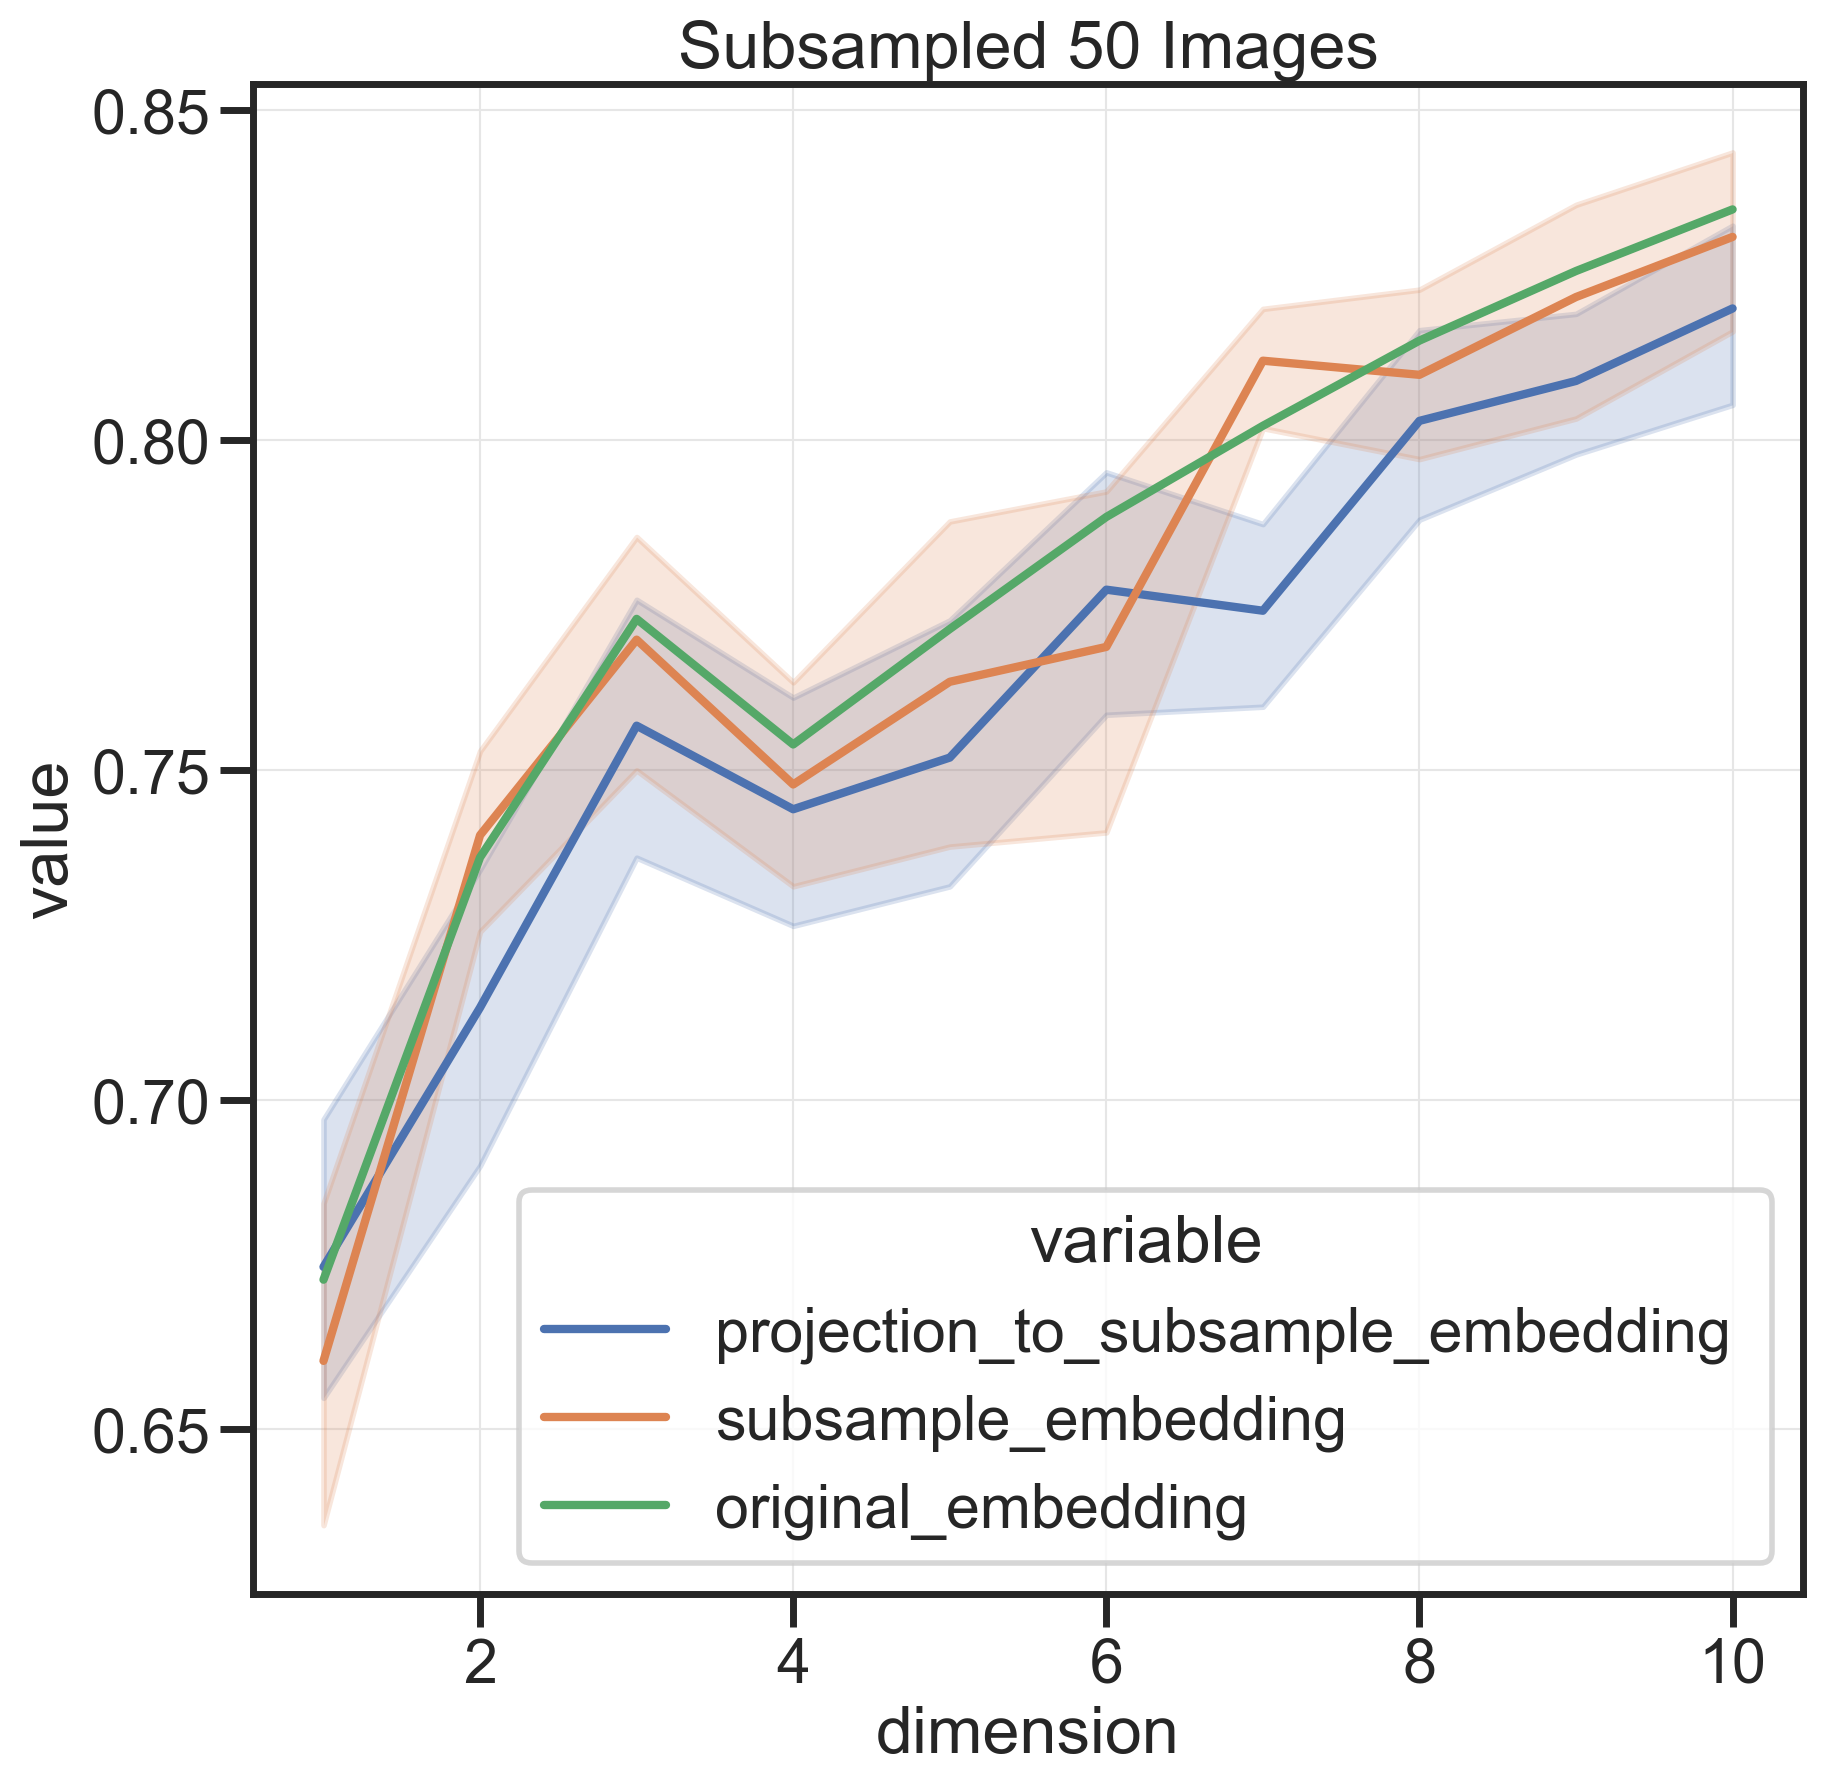

In [143]:
s=50
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable').set(title='Subsampled '+str(s)+' Images')




[Text(0.5, 1.0, 'Subsampled 500 Images')]

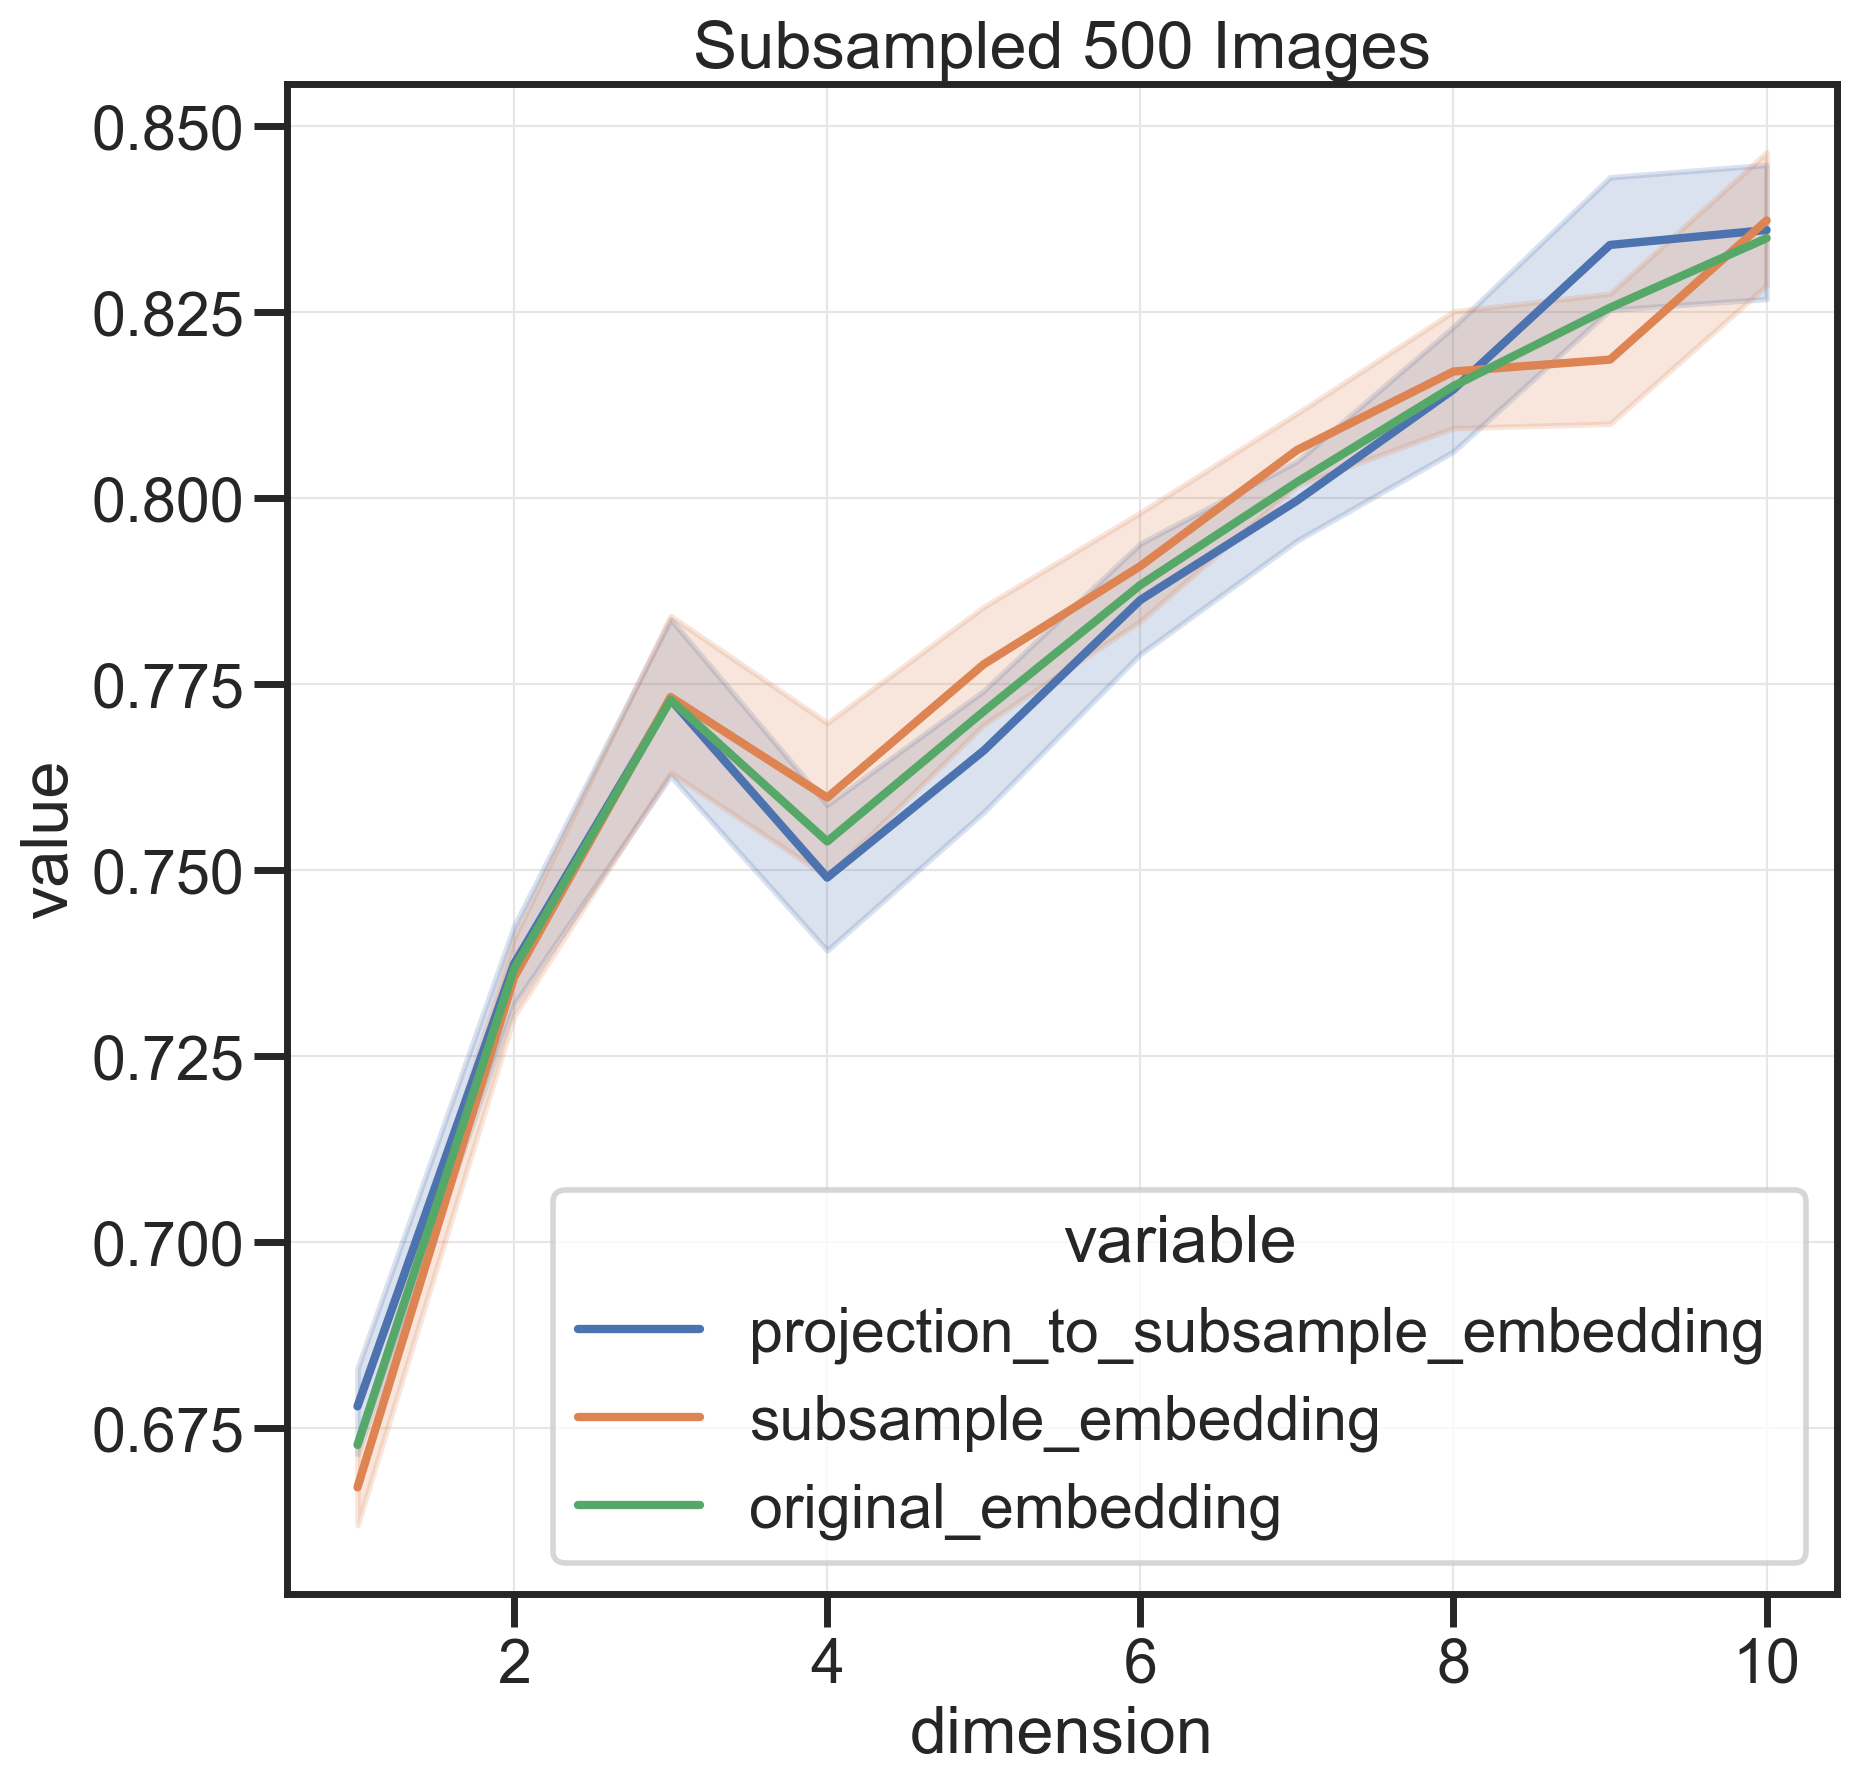

In [144]:
s=500
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable').set(title='Subsampled '+str(s)+' Images')




[Text(0.5, 1.0, 'Subsampled 5000 Images')]

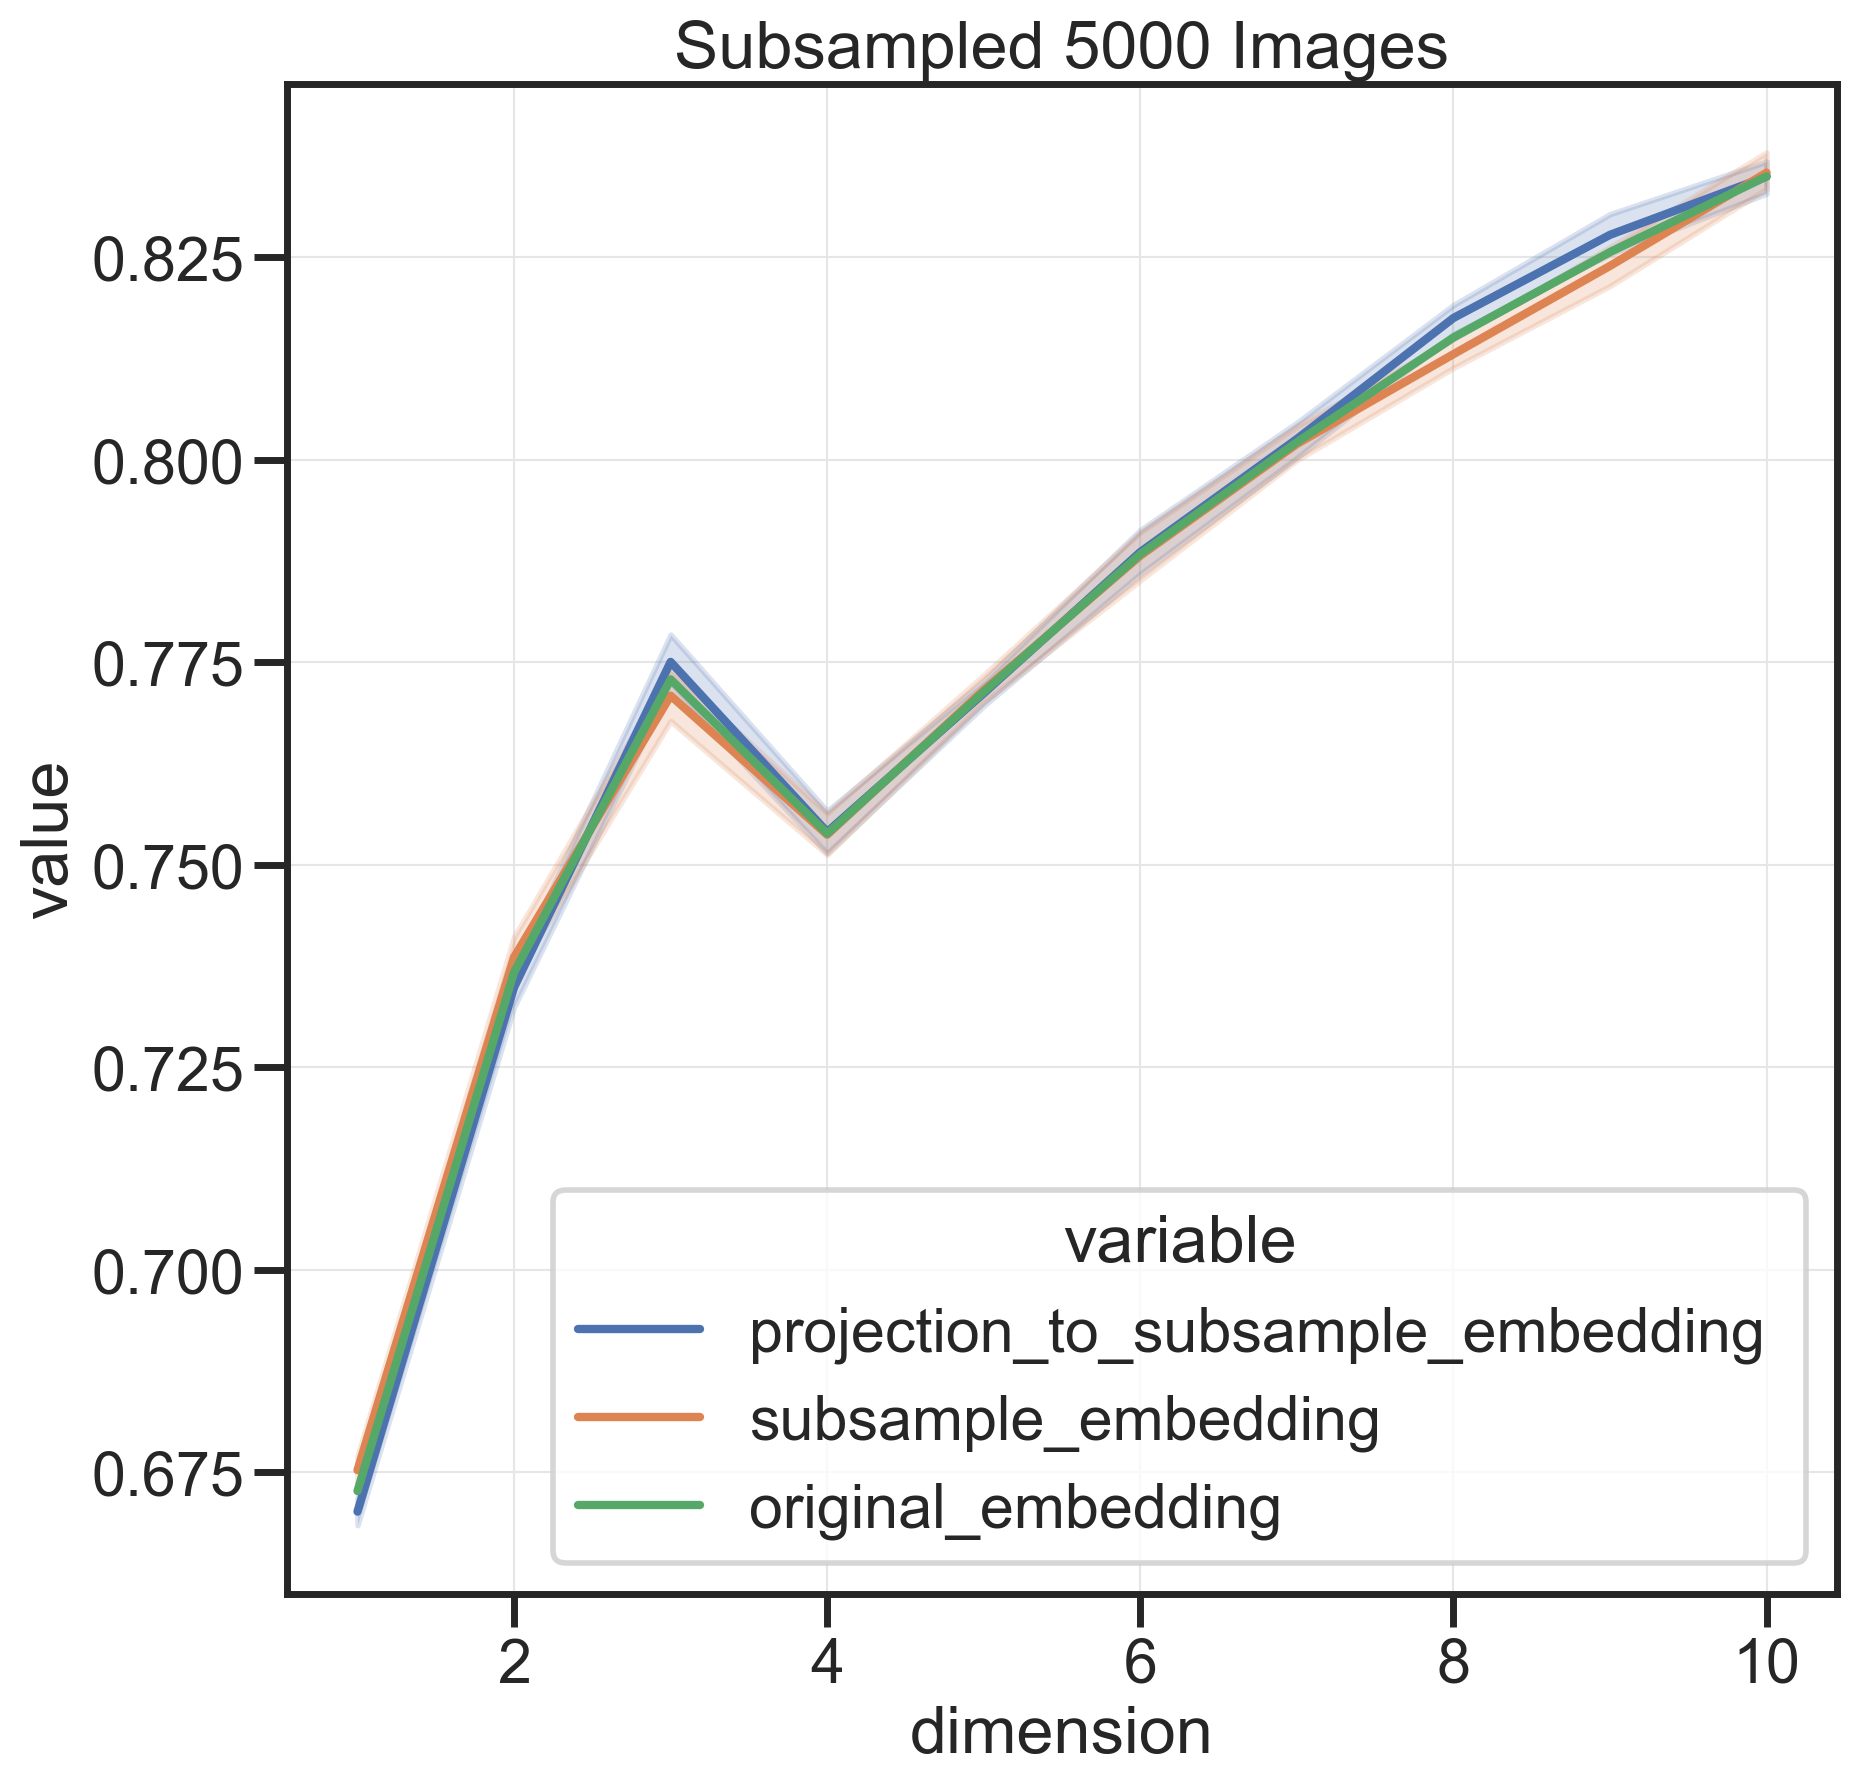

In [145]:
s=5000
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['projection_to_subsample_embedding ','subsample_embedding', 'original_embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable').set(title='Subsampled '+str(s)+' Images')



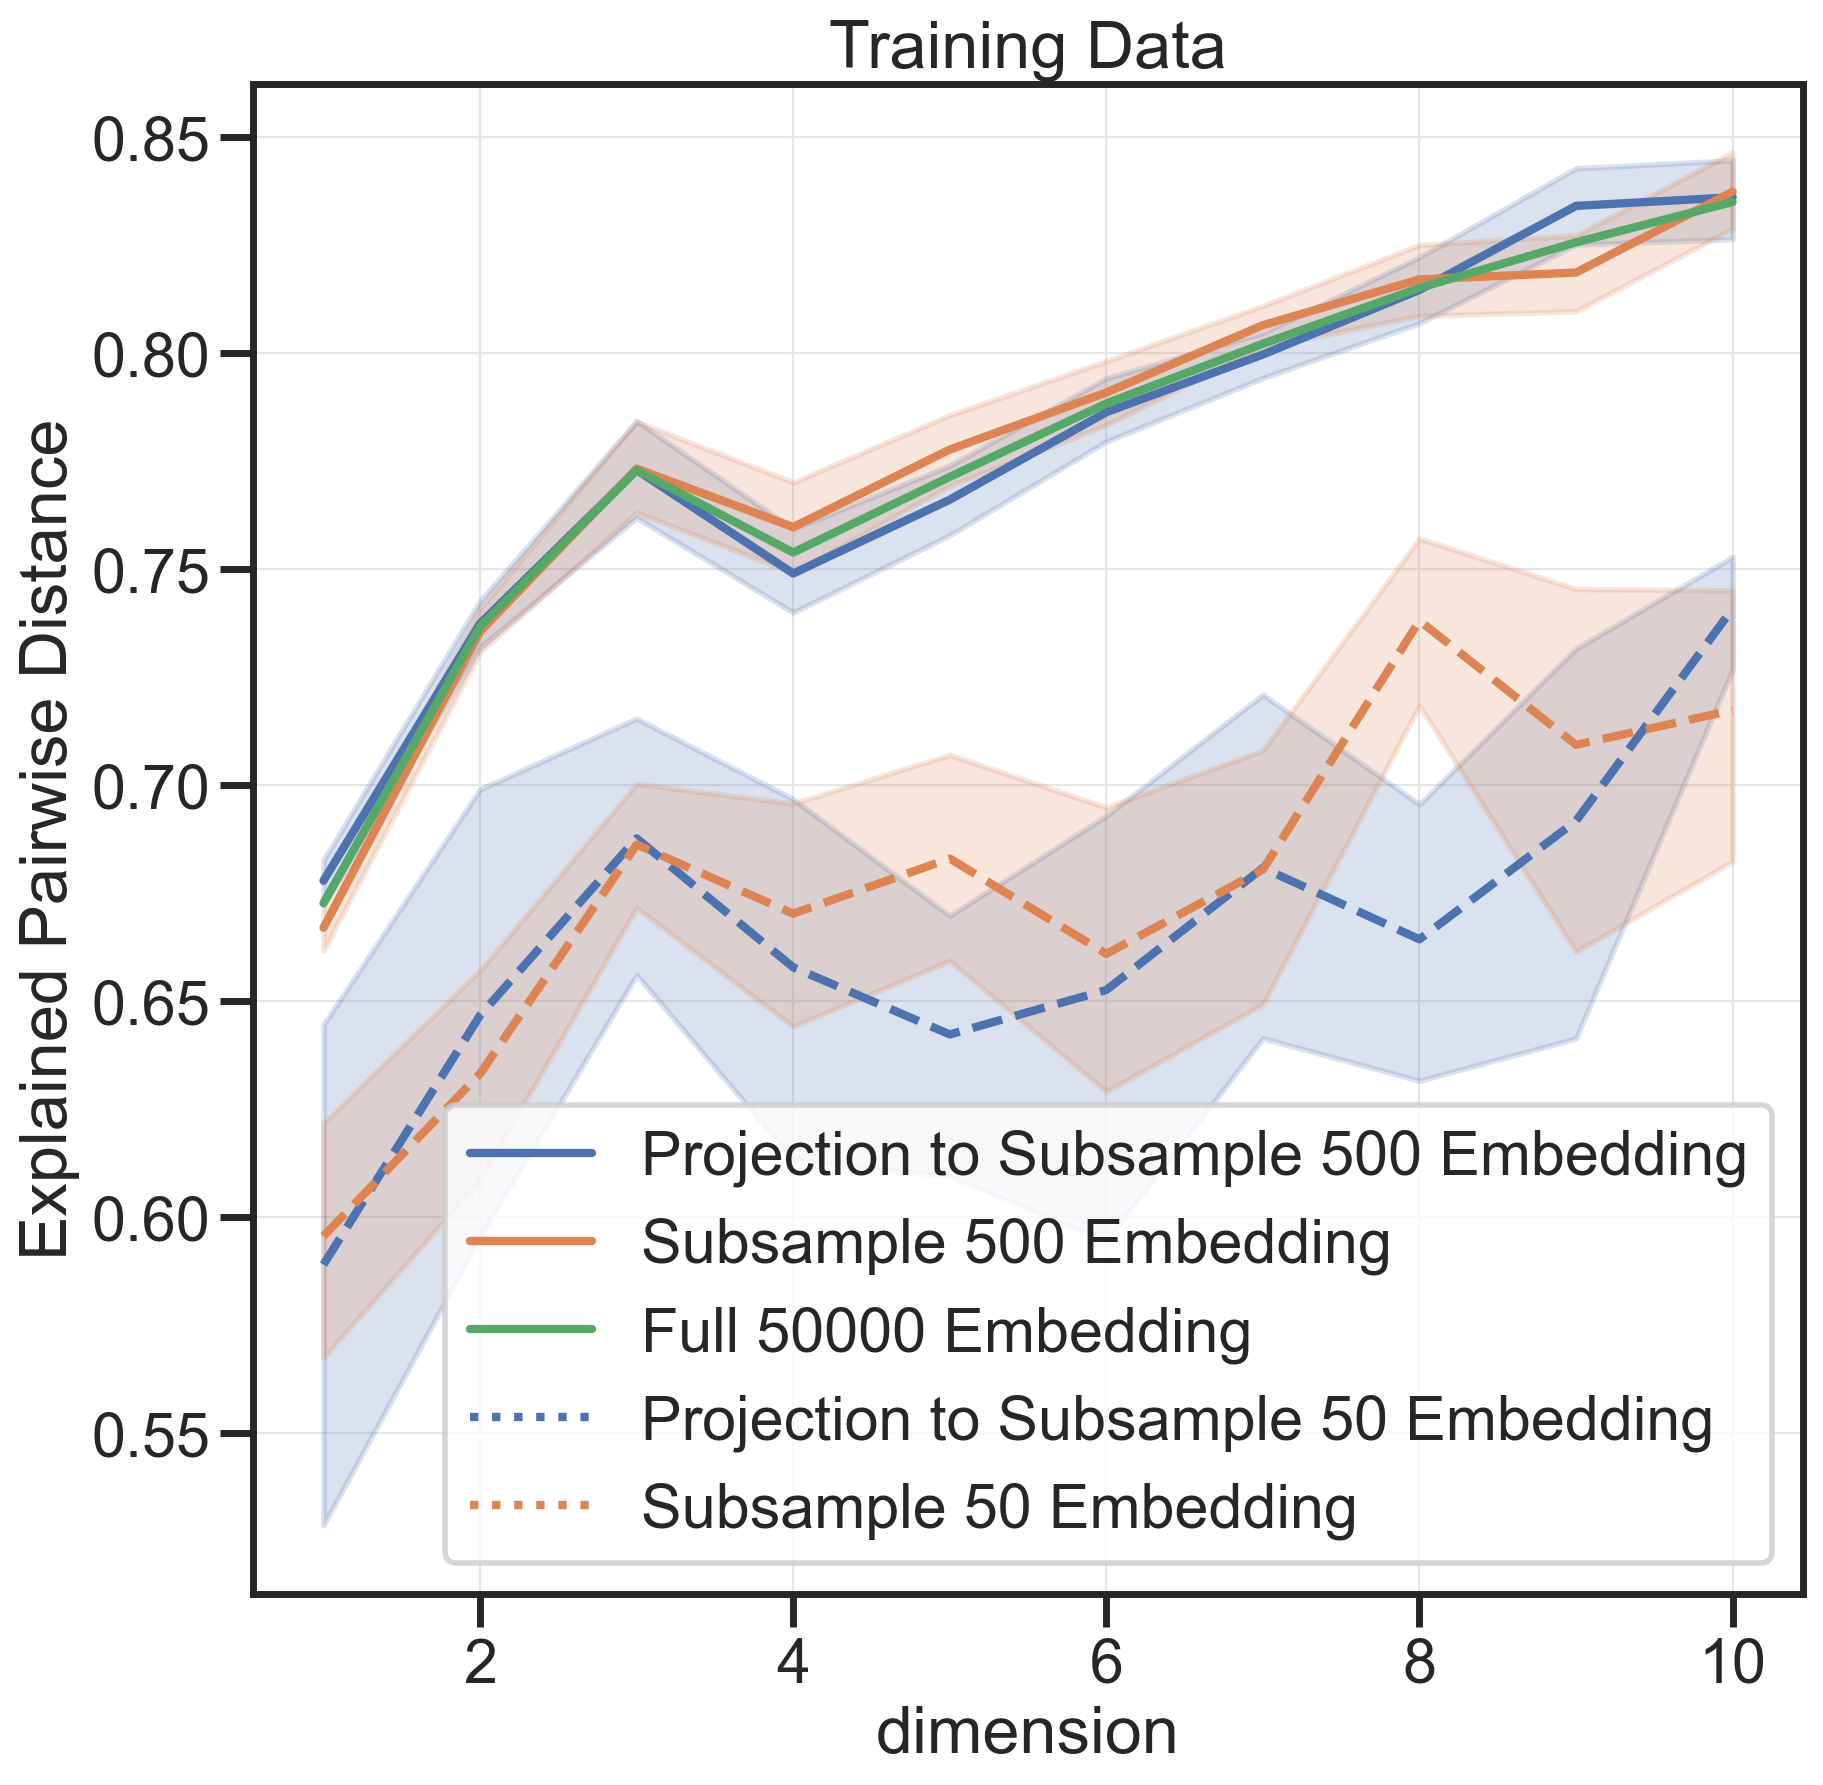

In [178]:

s=500
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 500 Embedding','Subsample 500 Embedding', 'Full 50000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 500 Embedding','Subsample 500 Embedding', 'Full 50000 Embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable',markers=True, dashes=False).set(title='Training Data')

s=5
tmp = rel_error_all_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 50 Embedding','Subsample 50 Embedding', 'Full 50000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 50 Embedding','Subsample 50 Embedding'])

ax =sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable', linestyle='dashed')
ax.set_ylabel('Explained Pairwise Distance')
leg = ax.legend()
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle(":")
leg_lines[4].set_linestyle(":")

In [201]:
rel_error_all_test = pickle.load(open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\test_subsample_err.p','rb'))


In [202]:
rel_error_all_test_ = {}
for s in [10,100,1000]:
    tpm = np.zeros((4,100))
    for t in range(10):
        tpm[0,10*t:10*(t+1)] = np.arange(1,11)
        tpm[1,10*t:10*(t+1)] = 1-rel_error_all_test[s][t,0,:]
        tpm[2,10*t:10*(t+1)] = 1-rel_error_all_test[s][t,1,:]
        tpm[3,10*t:10*(t+1)] = 1-rel_error_all_test[s][t,2,:]
        
    rel_error_all_test_[s] = tpm

In [209]:
pickle.dump(rel_error_all_test_,open(r'C:\Users\Itay\Documents\ipcaLocal\validation training embedidng\subsampling figures\test_subsample_err_all.p','wb'))


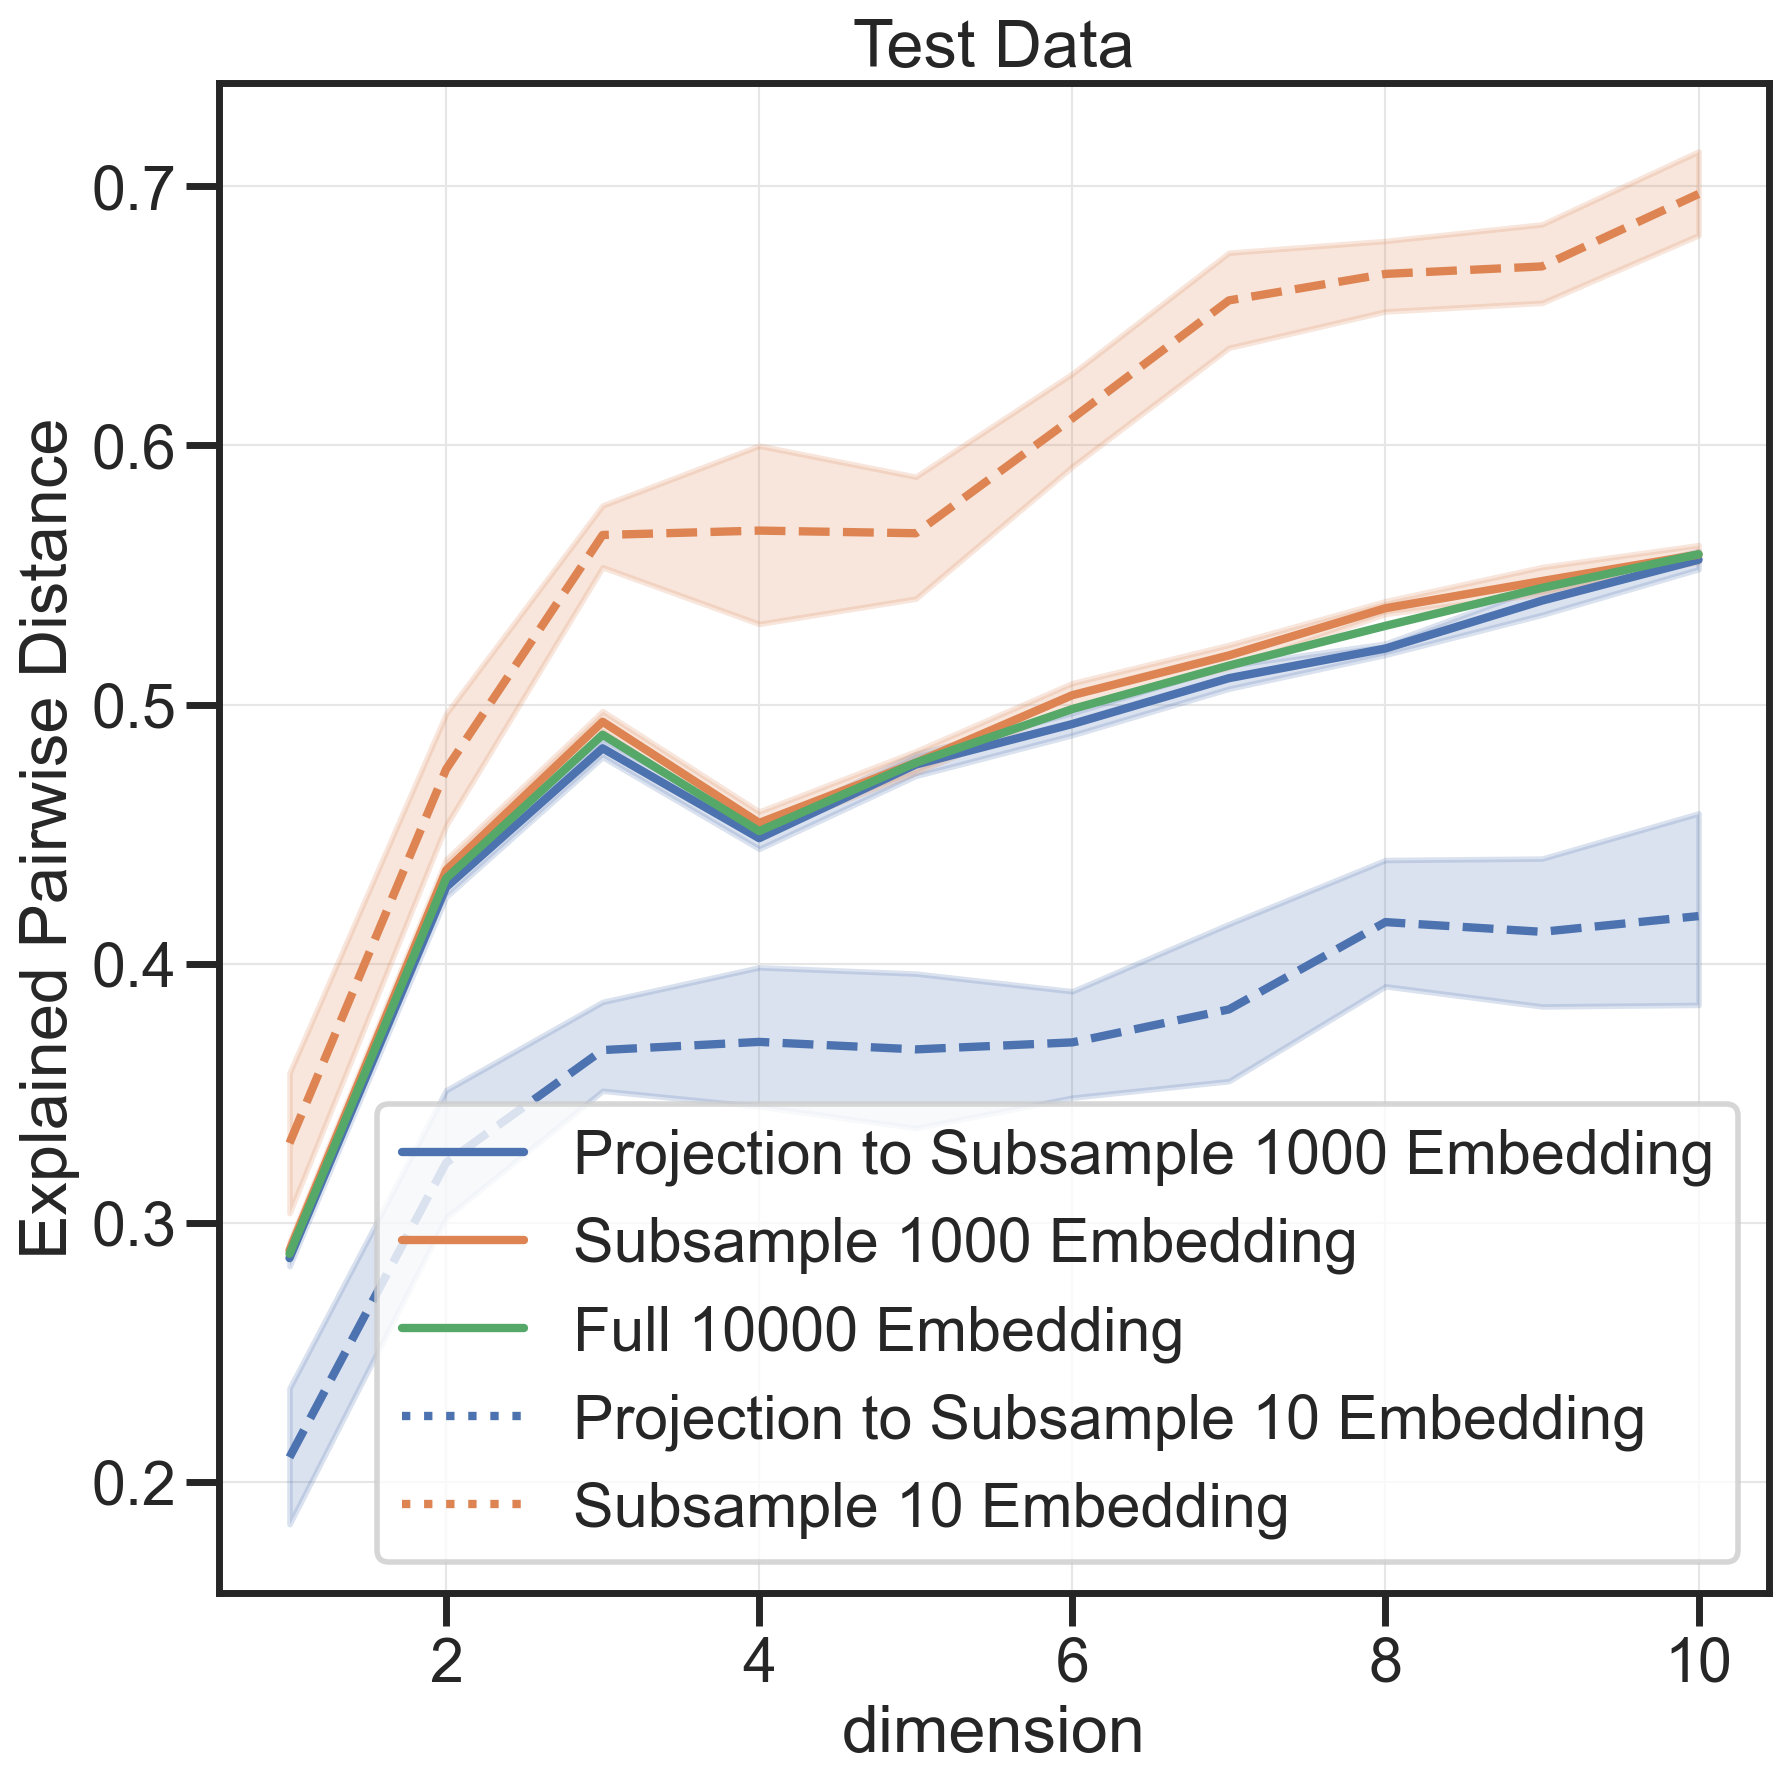

In [208]:

s=1000
tmp = rel_error_all_test_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 1000 Embedding','Subsample 1000 Embedding', 'Full 10000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 1000 Embedding','Subsample 1000 Embedding', 'Full 10000 Embedding'])

sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable',markers=True, dashes=False).set(title='Test Data')

s=10
tmp = rel_error_all_test_[s]

tmp_ds = pd.DataFrame(tmp.T, columns=['dimension','Projection to Subsample 10 Embedding','Subsample 10 Embedding', 'Full 10000 Embedding'])
tmp_ds  = tmp_ds .reset_index().melt(id_vars='dimension', value_vars=['Projection to Subsample 10 Embedding','Subsample 10 Embedding'])

ax =sns.lineplot(data=tmp_ds, x='dimension', y='value', hue='variable', linestyle='dashed')
ax.set_ylabel('Explained Pairwise Distance')
leg = ax.legend()
leg_lines = leg.get_lines()
leg_lines[3].set_linestyle(":")
leg_lines[4].set_linestyle(":")